<a href="https://colab.research.google.com/github/mahtabnik-polito/data-spaces/blob/main/DataSpaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading of Data**

In [4]:
#change the directory of data here
dfstr='/content/drive/MyDrive/dataSpace/divorce.csv'

In [2]:
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt 
import seaborn as sns
df = pd.read_csv(dfstr)
print(f"the column where at least a column is null are: {sum(df.isnull().sum())}" ) 
print(f"the shape of the dataset is the following: {df.shape}")
y1=df['Class']
print('number of different values:' , y1.value_counts())
display(df.head())

the column where at least a column is null are: 0
the shape of the dataset is the following: (170, 55)
number of different values: 0    86
1    84
Name: Class, dtype: int64


Atr1  Atr2  Atr3  Atr4  Atr5  Atr6  ...  Atr50  Atr51  Atr52  Atr53  Atr54  Class
0     2     2     4     1     0     0  ...      3      2      3      2      1      1
1     4     4     4     4     4     0  ...      4      4      4      2      2      1
2     2     2     2     2     1     3  ...      1      1      2      2      2      1
3     3     2     3     2     3     3  ...      3      3      2      2      2      1
4     2     2     1     1     1     1  ...      2      2      2      1      0      1

[5 rows x 55 columns]

**Outliers and missing Data**

Index(['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8', 'Atr9',
       'Atr10', 'Atr11', 'Atr12', 'Atr13', 'Atr14', 'Atr15', 'Atr16', 'Atr17',
       'Atr18', 'Atr19', 'Atr20', 'Atr21', 'Atr22', 'Atr23', 'Atr24', 'Atr25',
       'Atr26', 'Atr27', 'Atr28', 'Atr29', 'Atr30', 'Atr31', 'Atr32', 'Atr33',
       'Atr34', 'Atr35', 'Atr36', 'Atr37', 'Atr38', 'Atr39', 'Atr40', 'Atr41',
       'Atr42', 'Atr43', 'Atr44', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49',
       'Atr50', 'Atr51', 'Atr52', 'Atr53', 'Atr54'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

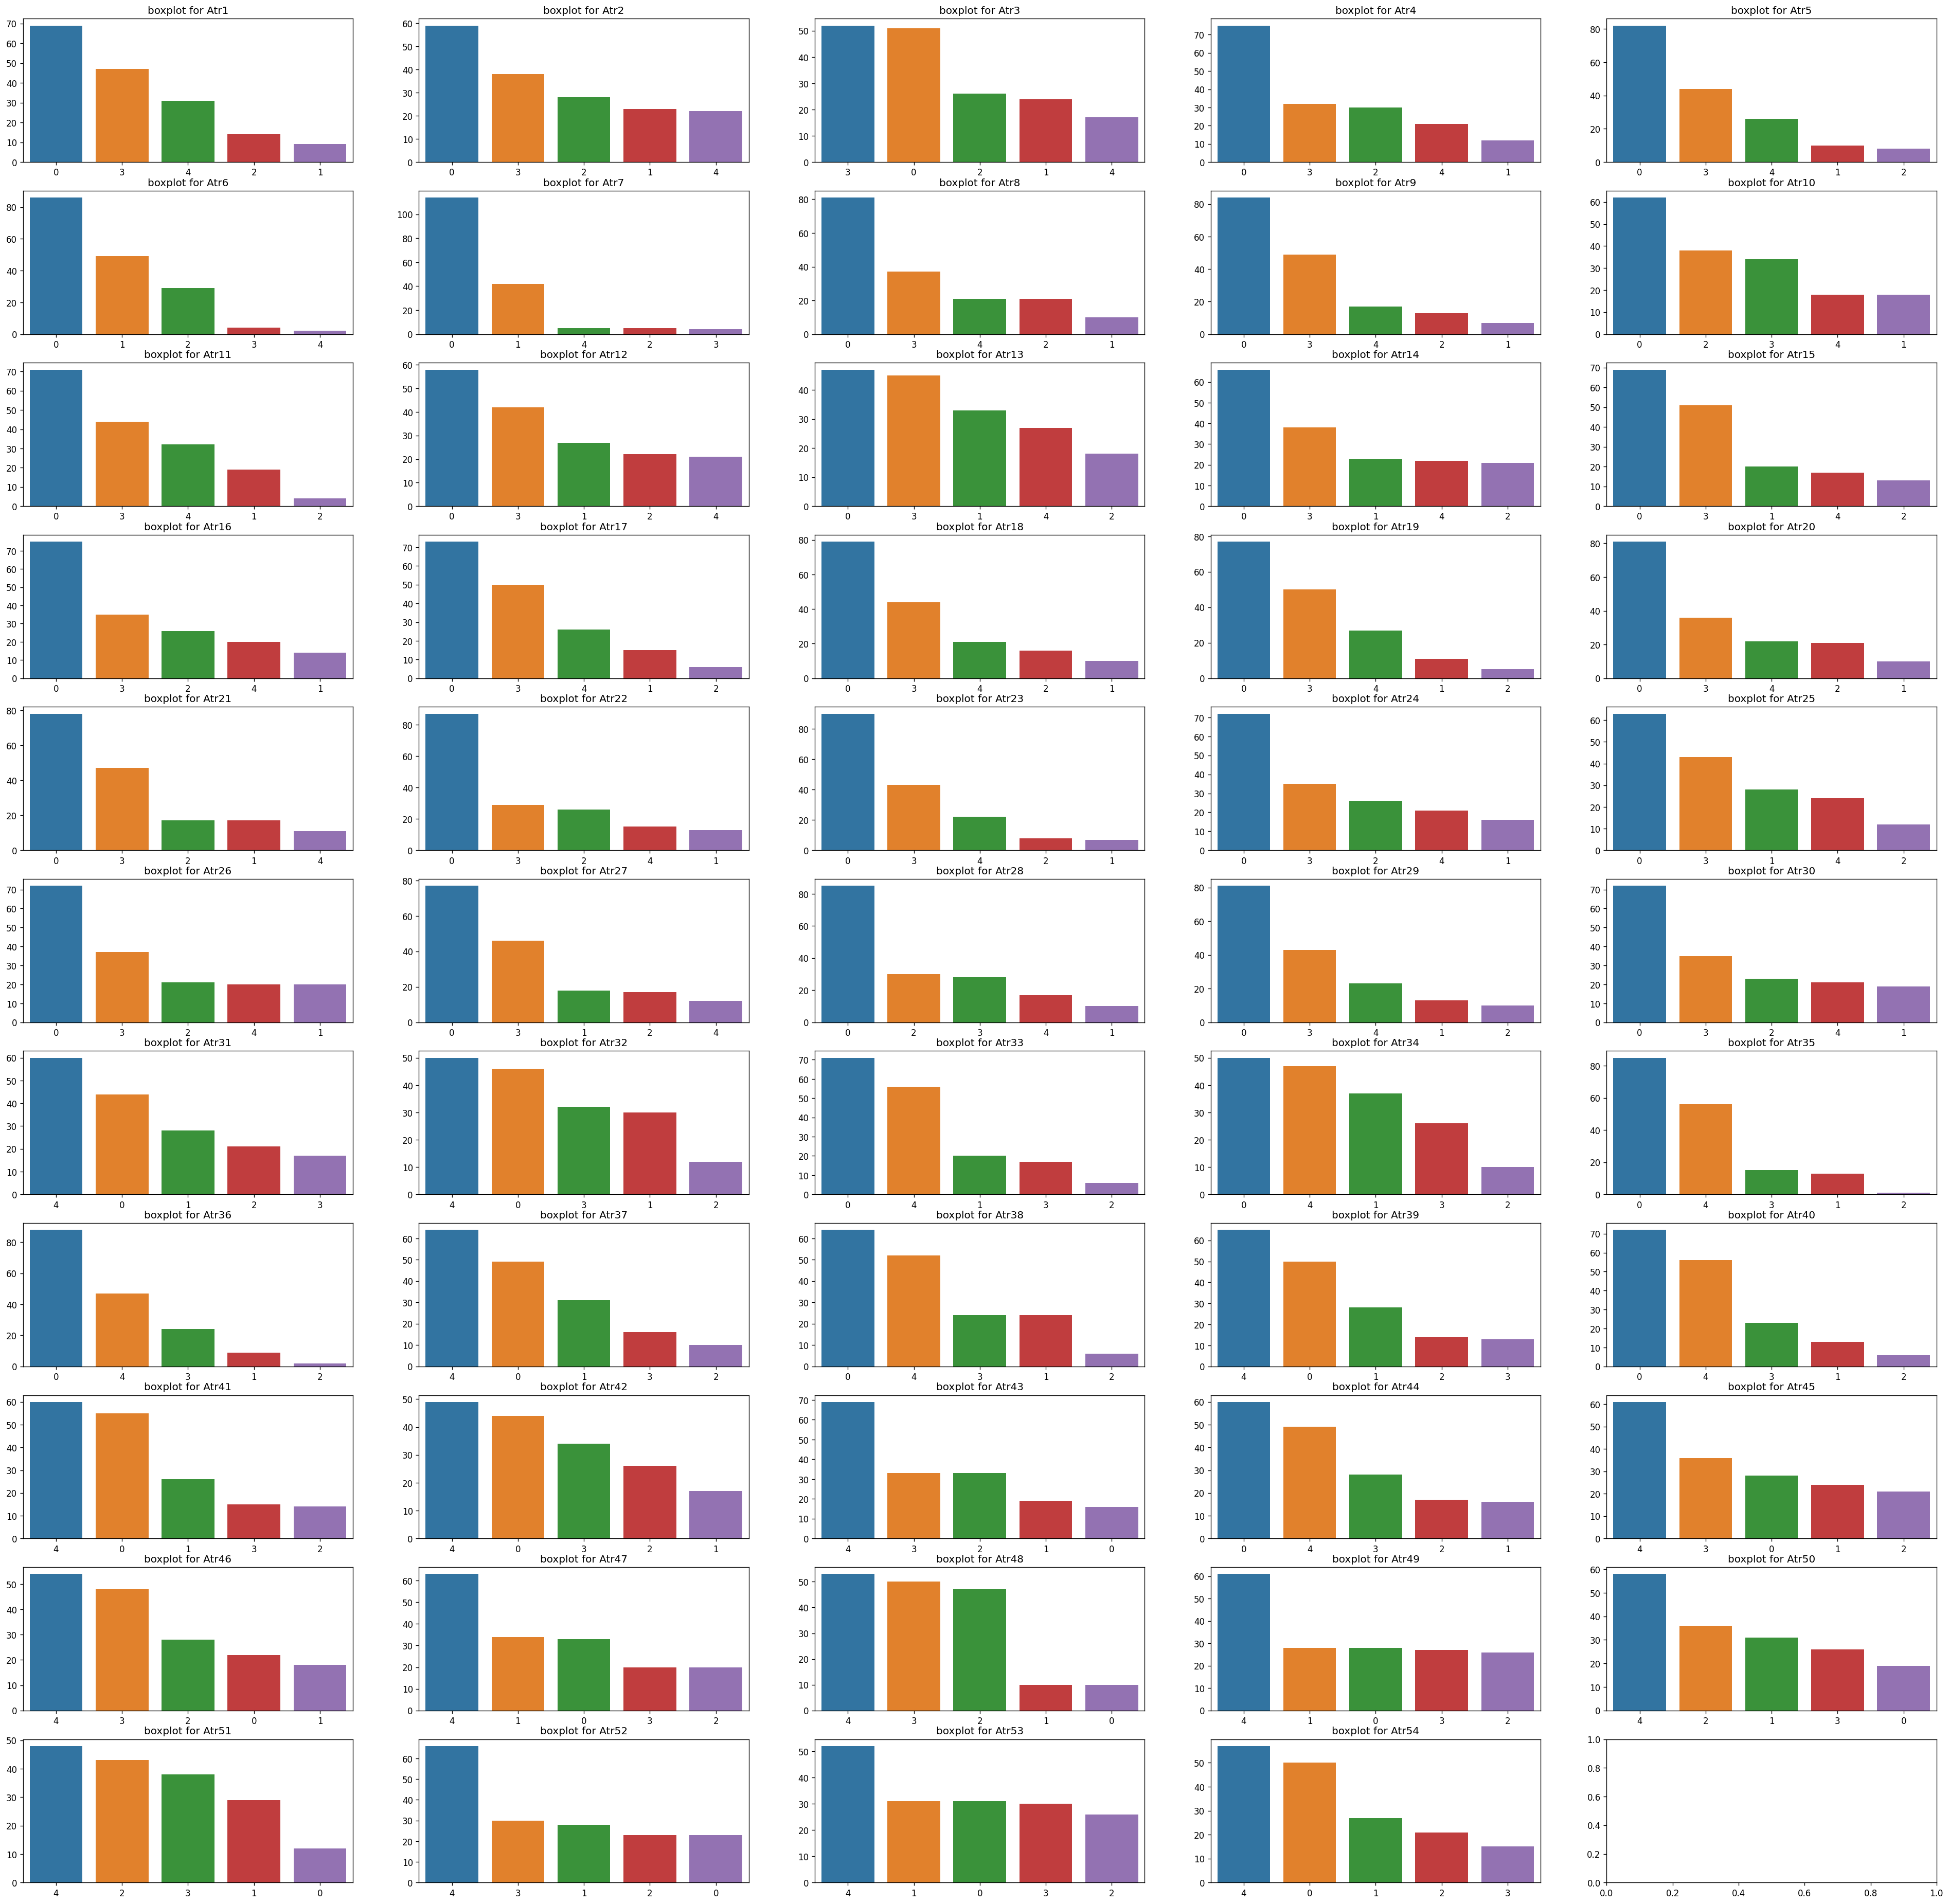

In [3]:
fig, axs = plt.subplots(nrows=11, ncols=5, figsize=(40,40), dpi=120)

print(df.keys()[:54])
for ind,feature in enumerate(df.keys()[:54]): 
  try: 
    title = f"boxplot for {feature}" 
    row = ind/5
    column = ind%5 
    sns.countplot(df[feature],orient="v",ax=axs[int(row)][column], order = df[feature].value_counts().index).set_title(title) 
    axs[int(row)][column].set_xlabel("") 
    axs[int(row)][column].set_ylabel("") 

  except Exception as e:
     pass

plt.show()



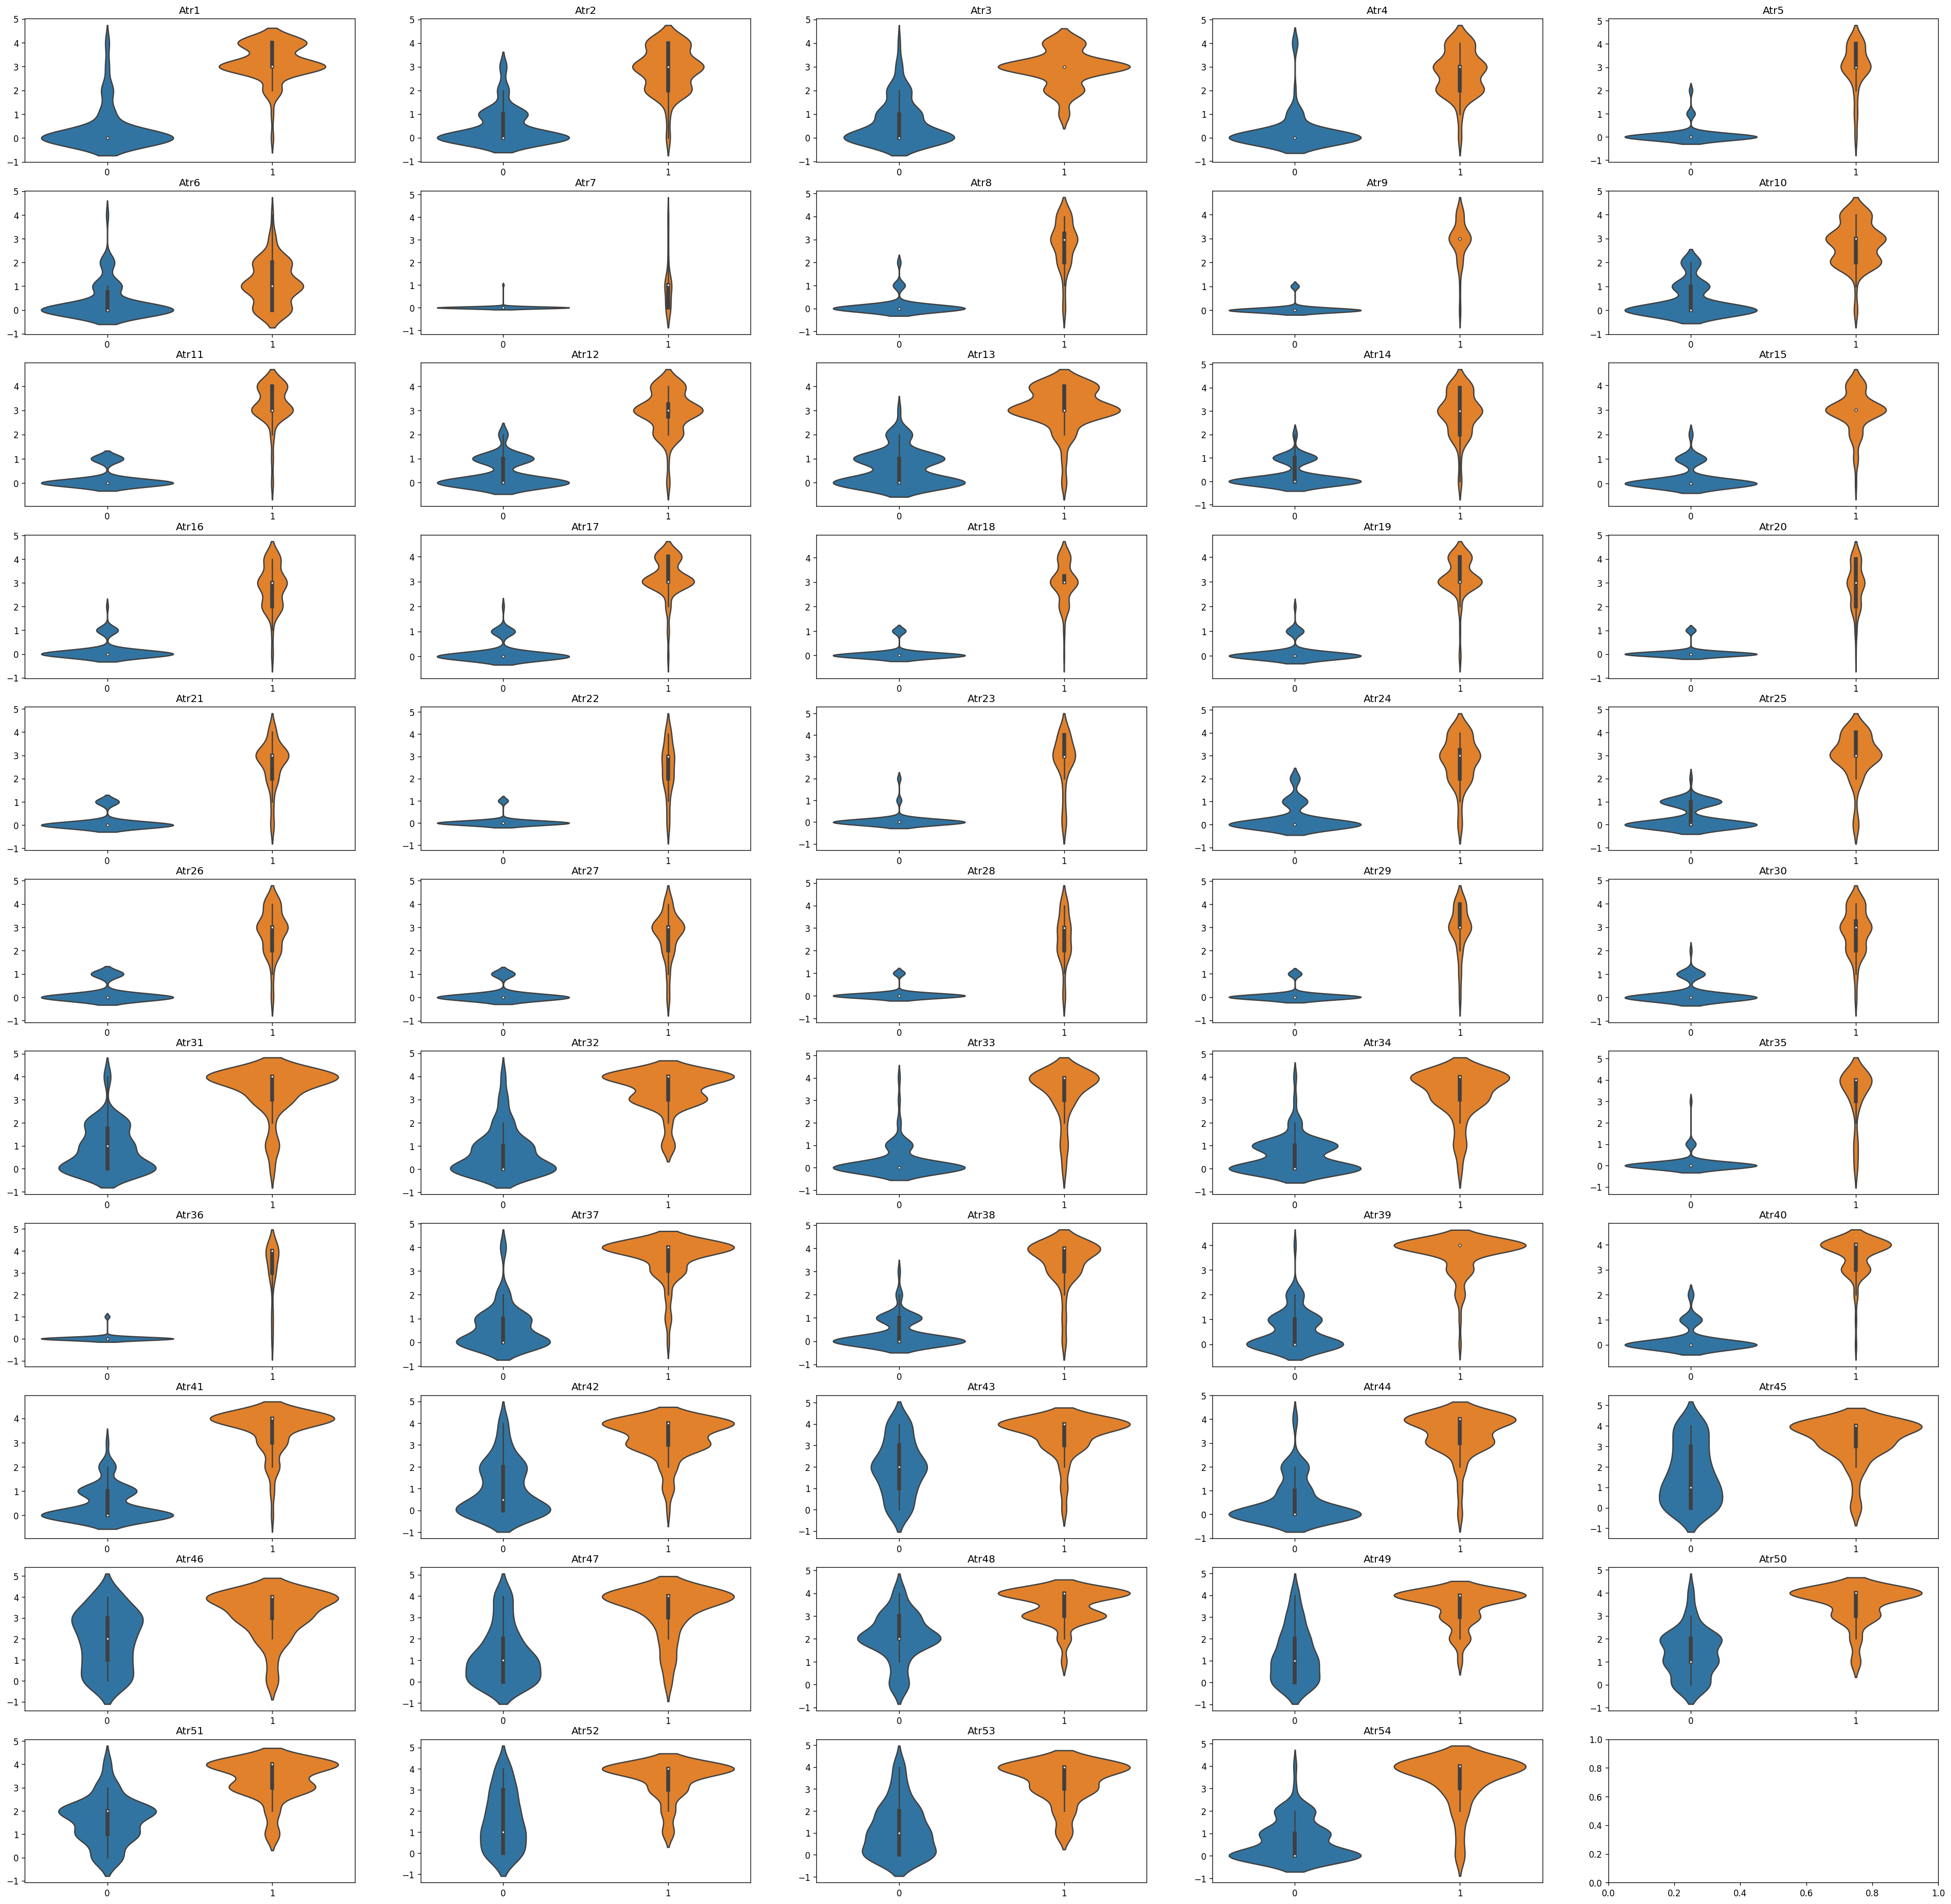

In [4]:
fig, axs = plt.subplots(nrows=11, ncols=5, figsize=(40,40), dpi=120)
for ind, feature in enumerate(df.keys()[0:54]): 
 try:
   row = ind/5 
   column = ind%5 
   fig = sns.violinplot(data=df, y=feature, ax=axs[int(row)][column], x='Class').set_title(feature)
   axs[int(row)][column].set_xlabel("") 
   axs[int(row)][column].set_ylabel("")
 except Exception as e:
   pass
plt.show()


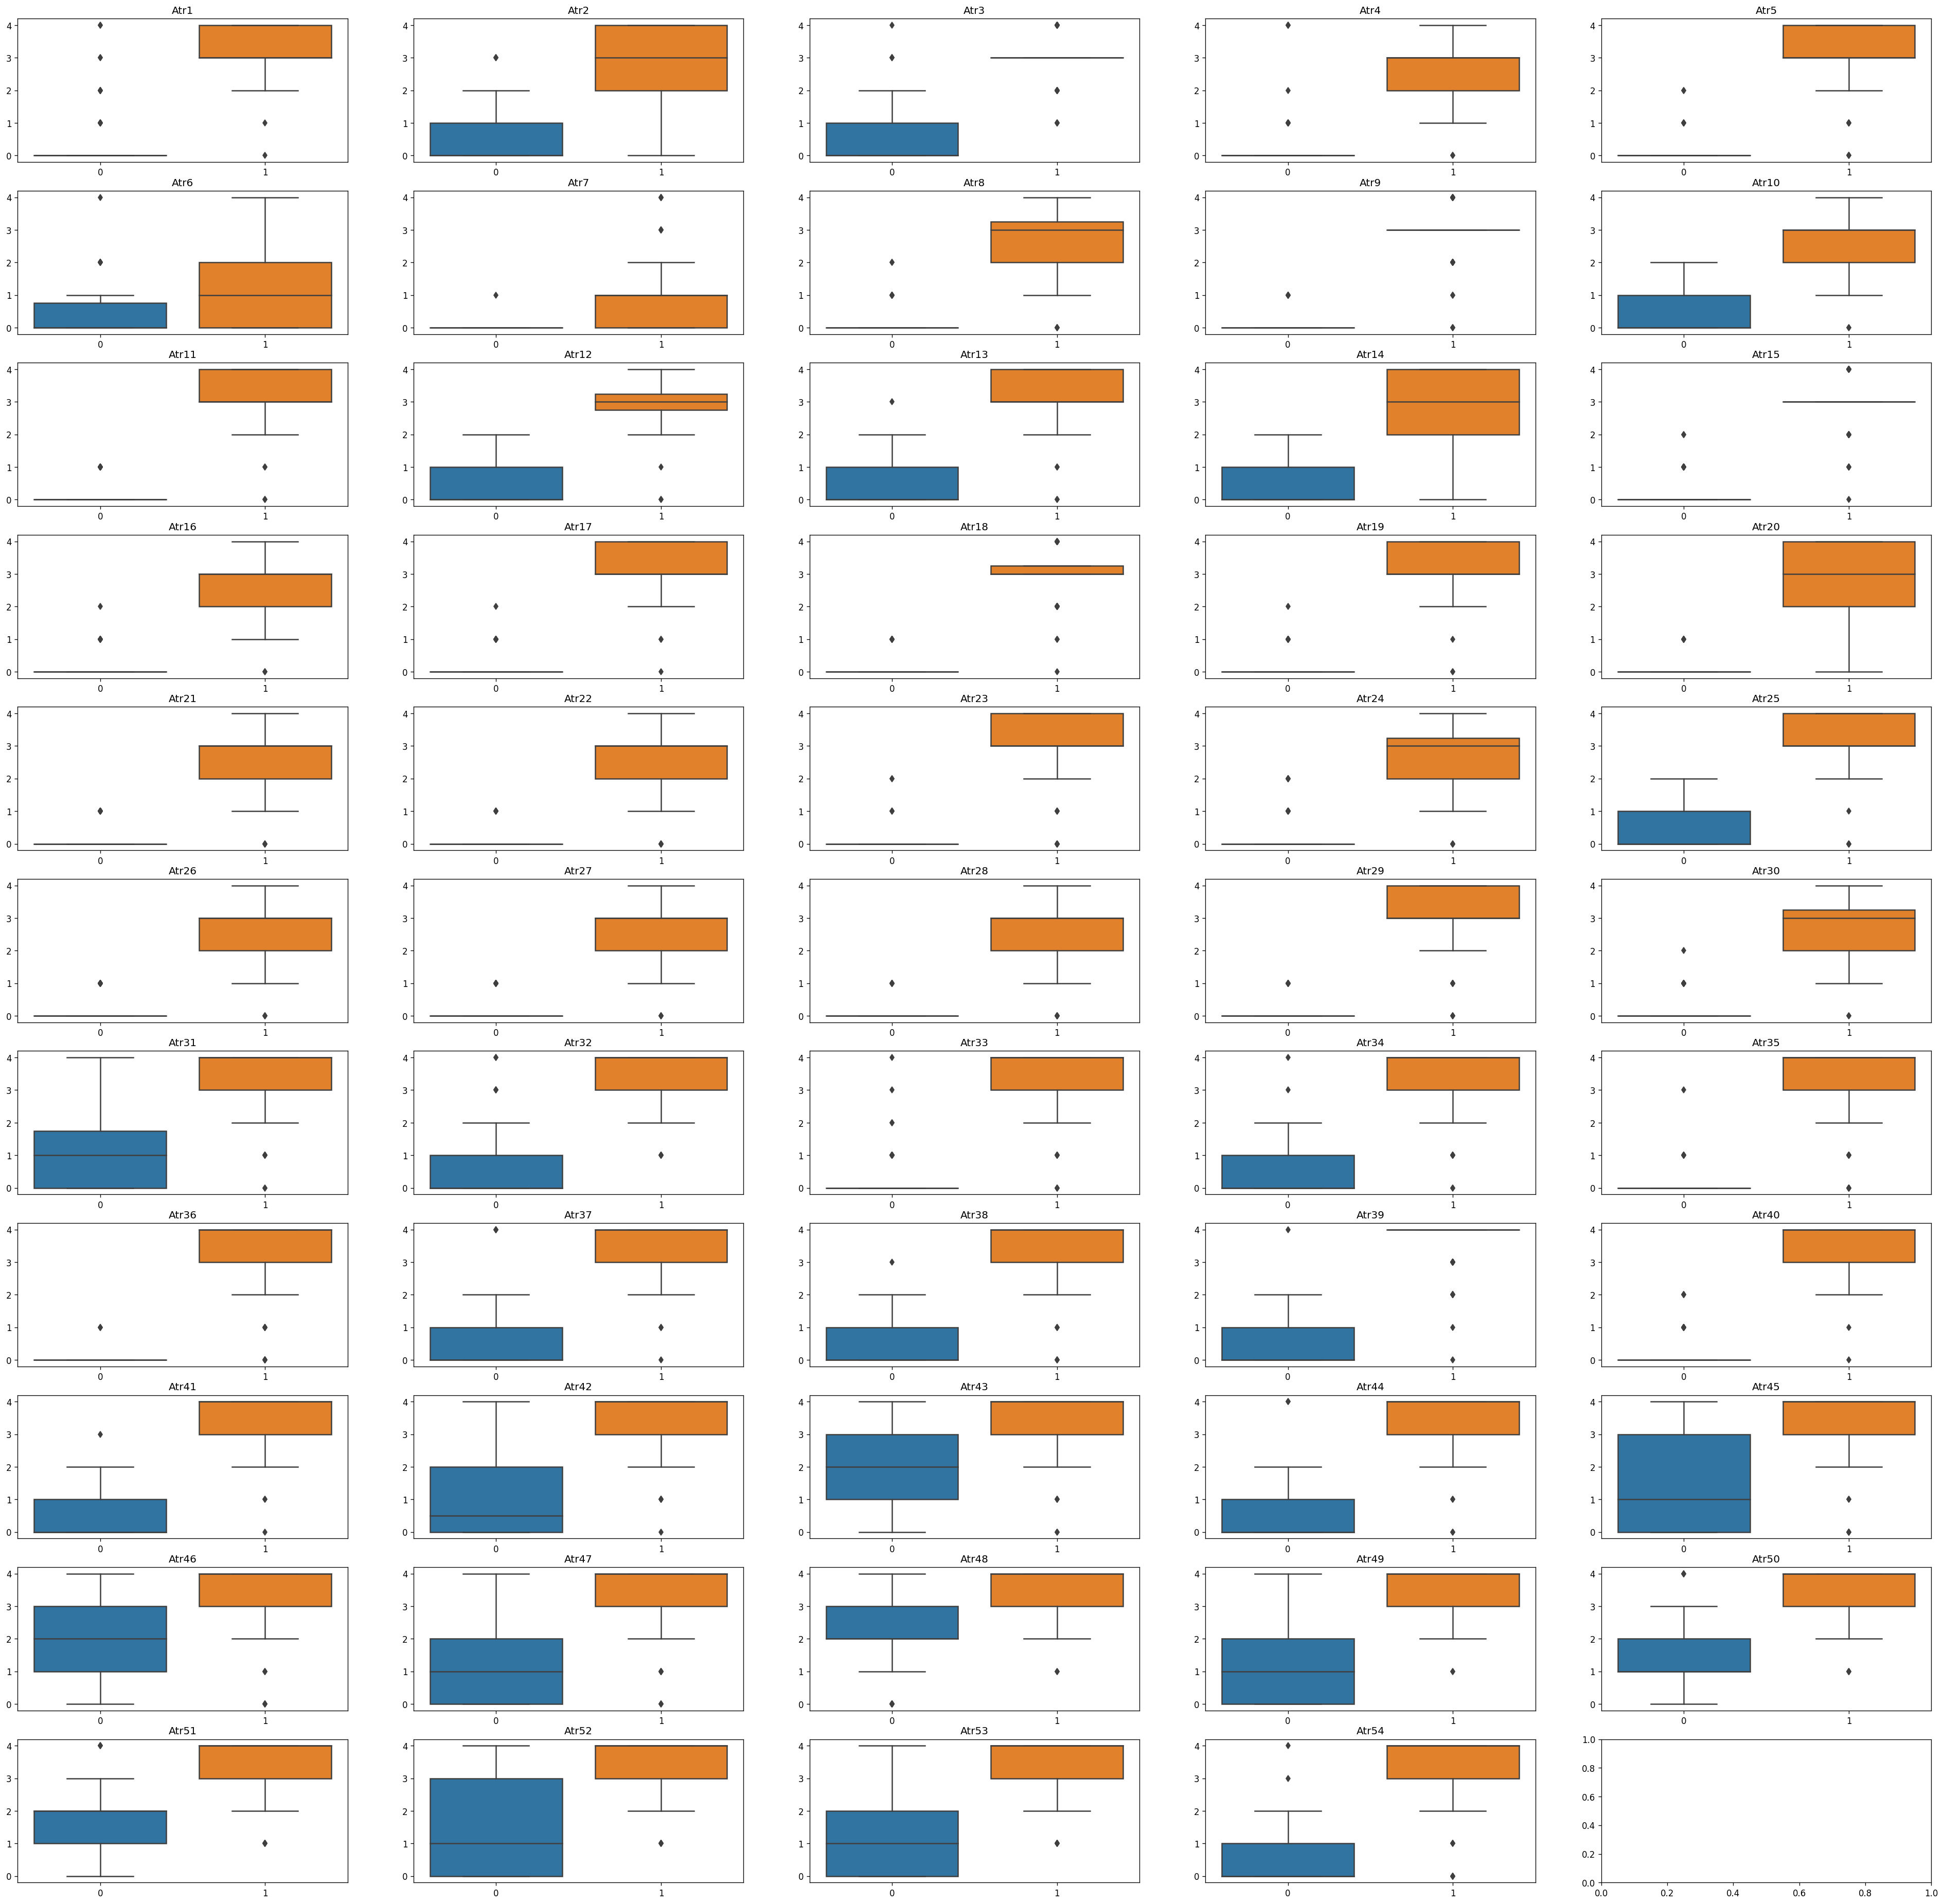

In [5]:
fig, axs = plt.subplots(nrows=11, ncols=5, figsize=(40,40), dpi=120)
for ind, feature in enumerate(df.keys()[0:54]): 
 try:
   row = ind/5 
   column = ind%5 
   fig = sns.boxplot(data=df, y=feature, ax=axs[int(row)][column], x='Class').set_title(feature)
   axs[int(row)][column].set_xlabel("") 
   axs[int(row)][column].set_ylabel("")
 except Exception as e:
   pass
plt.show()

[('Atr5', 'Class'), ('Atr9', 'Class'), ('Atr11', 'Class'), ('Atr15', 'Class'), ('Atr17', 'Class'), ('Atr18', 'Class'), ('Atr19', 'Class'), ('Atr20', 'Class'), ('Atr29', 'Class'), ('Atr39', 'Class'), ('Atr40', 'Class'), ('Atr41', 'Class')]


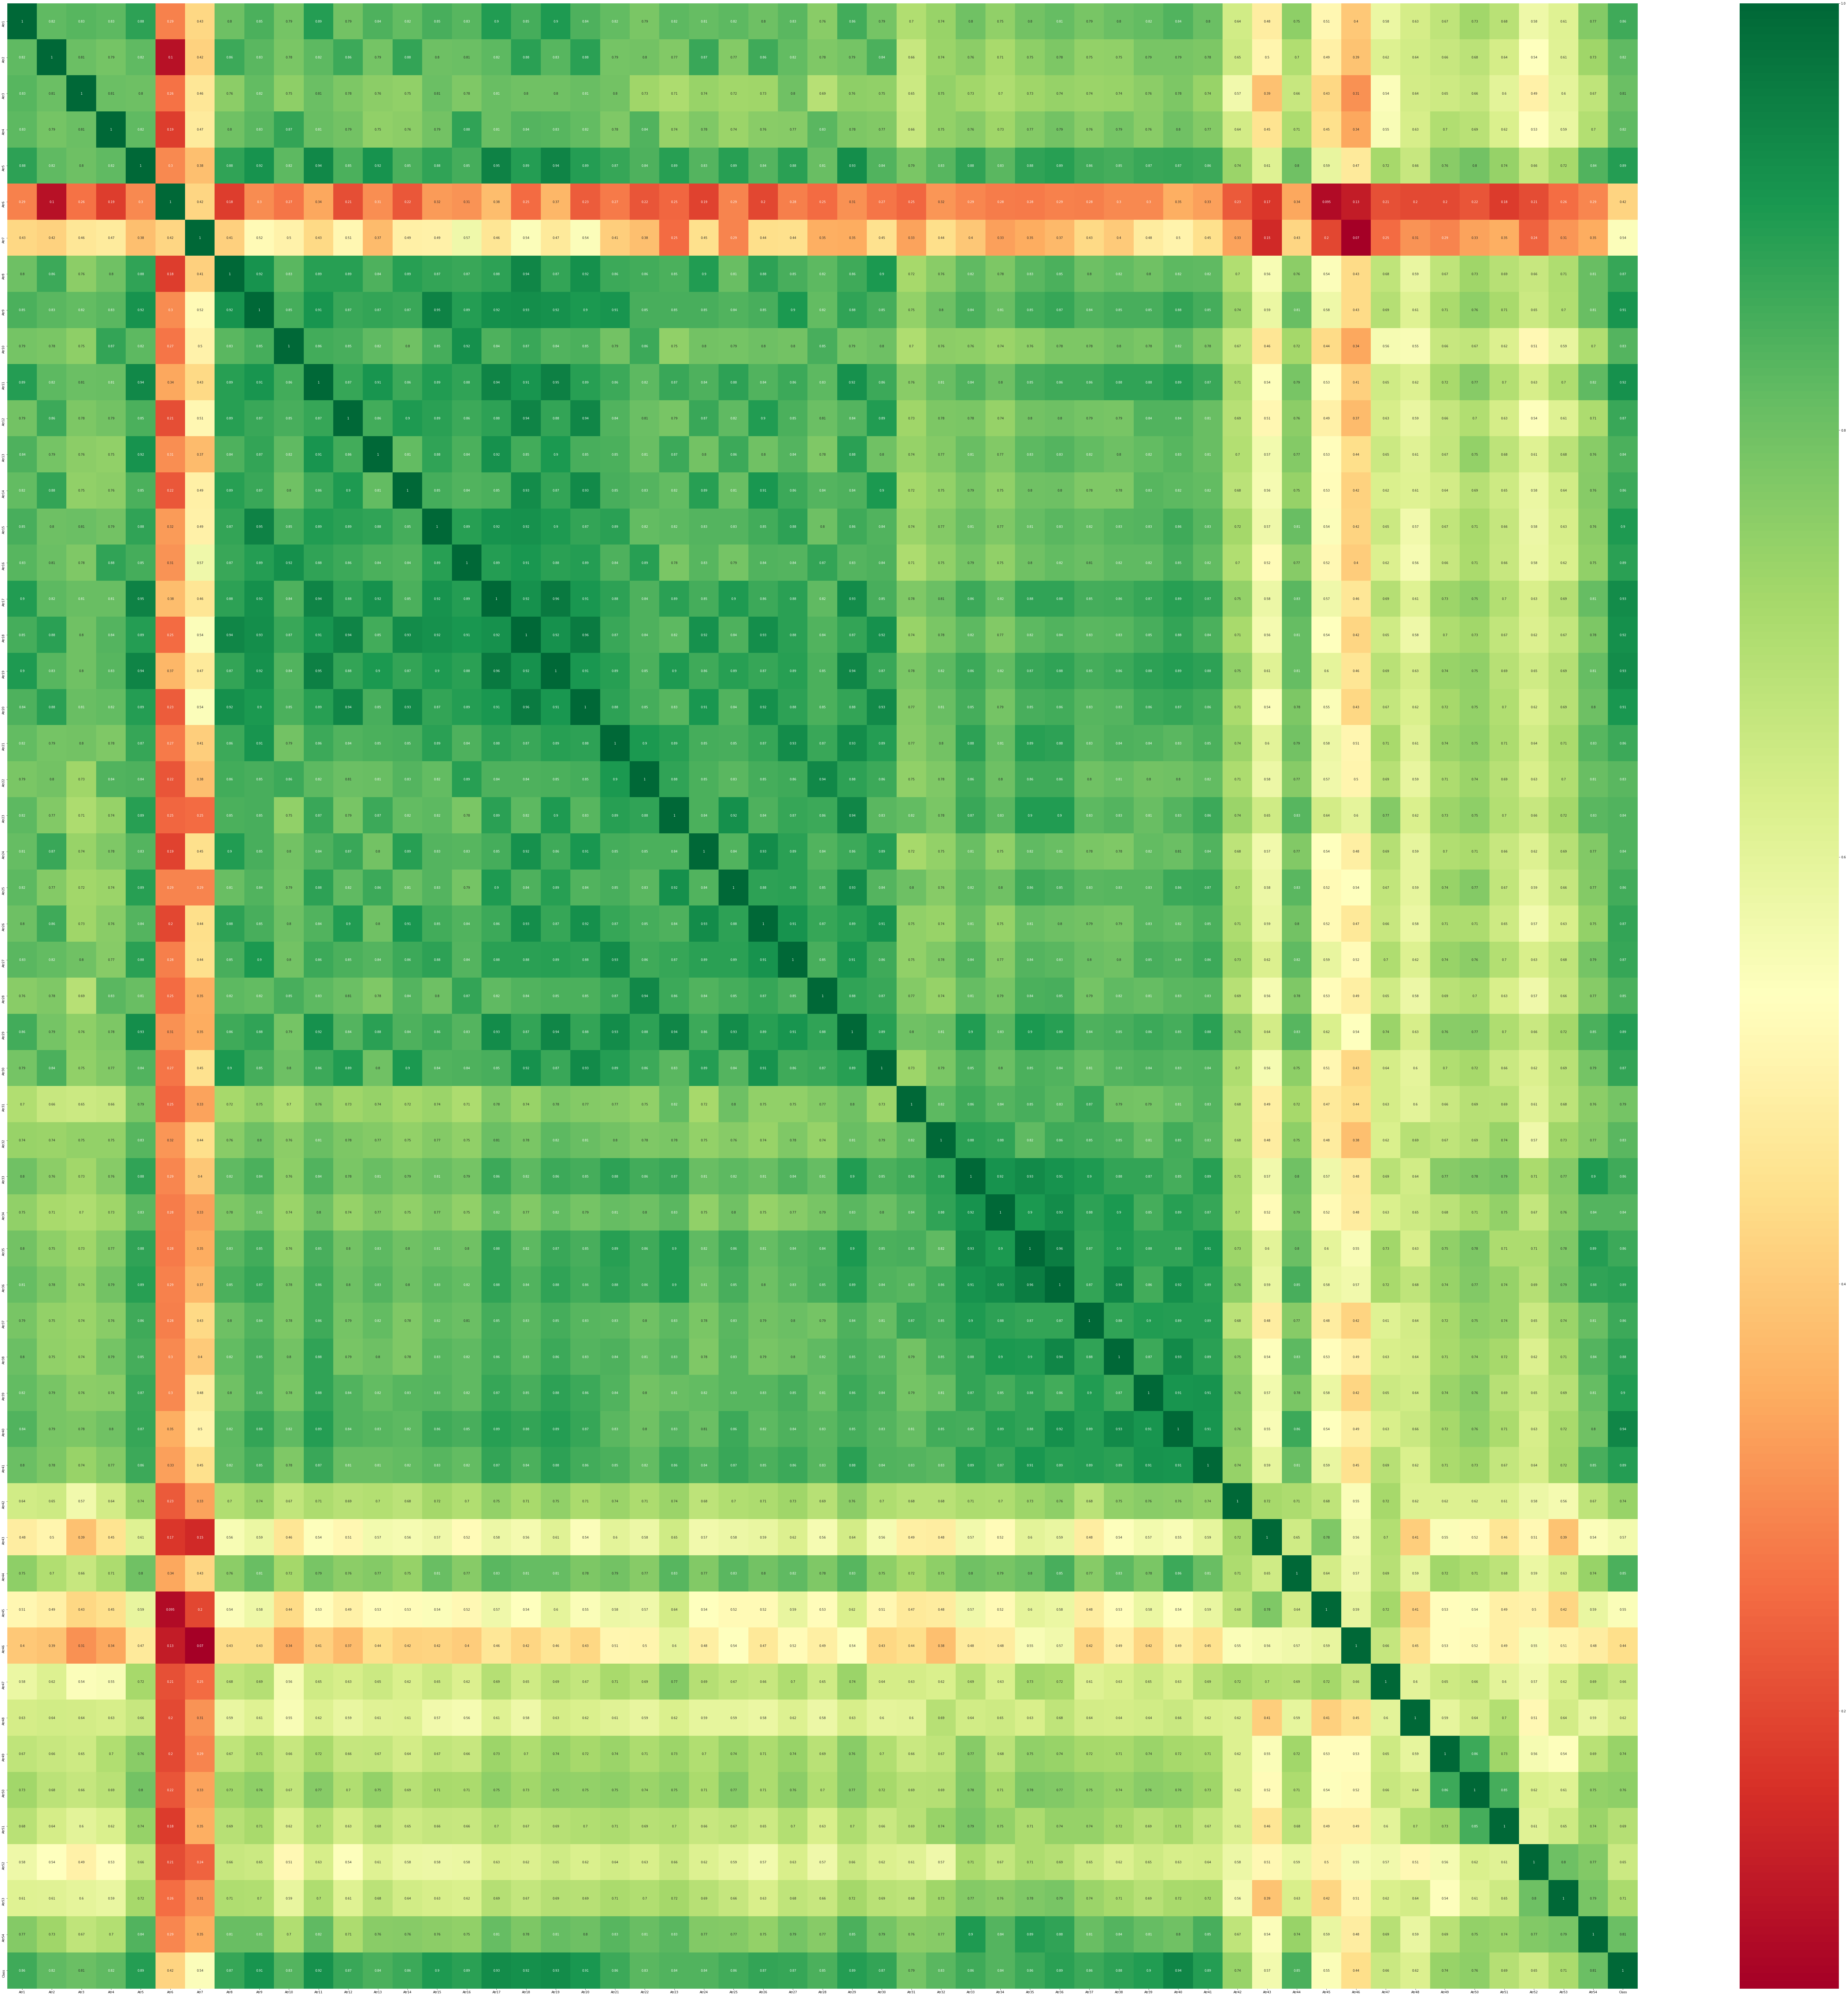

In [6]:
import numpy as np
corrMat = df.corr()
topCorrFeature = corrMat.index
plt.figure(figsize=(120,120))
g=sns.heatmap(df[topCorrFeature].corr() , annot=True , cmap="RdYlGn")
high_corr_var=np.where(corrMat>0.89)
high_corr_var=[(corrMat.columns[x],corrMat.columns[y]) for x,y in zip(*high_corr_var) if x!=y and corrMat.columns[y]=='Class']
print(high_corr_var)

[0.00437751 0.01621424 0.00791588 0.00176429 0.04341652 0.00175577
 0.00021709 0.03839366 0.05763743 0.00114596 0.01315029 0.00494804
 0.0012447  0.01031065 0.02149733 0.03057527 0.0884006  0.06111122
 0.08660227 0.04504333 0.0337672  0.00927461 0.00727315 0.0167749
 0.03744329 0.01768765 0.01753844 0.0331201  0.04400147 0.03064832
 0.00859036 0.00166265 0.02731558 0.00135484 0.00847187 0.02984579
 0.00952946 0.00381439 0.02359682 0.06712289 0.01330607 0.00095911
 0.00031937 0.01204752 0.00088564 0.00083335 0.00076395 0.00071595
 0.00061773 0.00158626 0.00045798 0.00133625 0.001615  ]


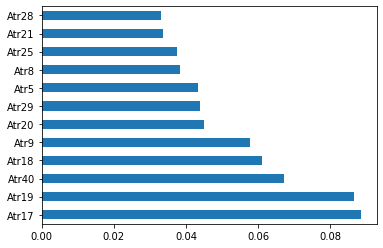

In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv(dfstr)
X = df.iloc[:,:53]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

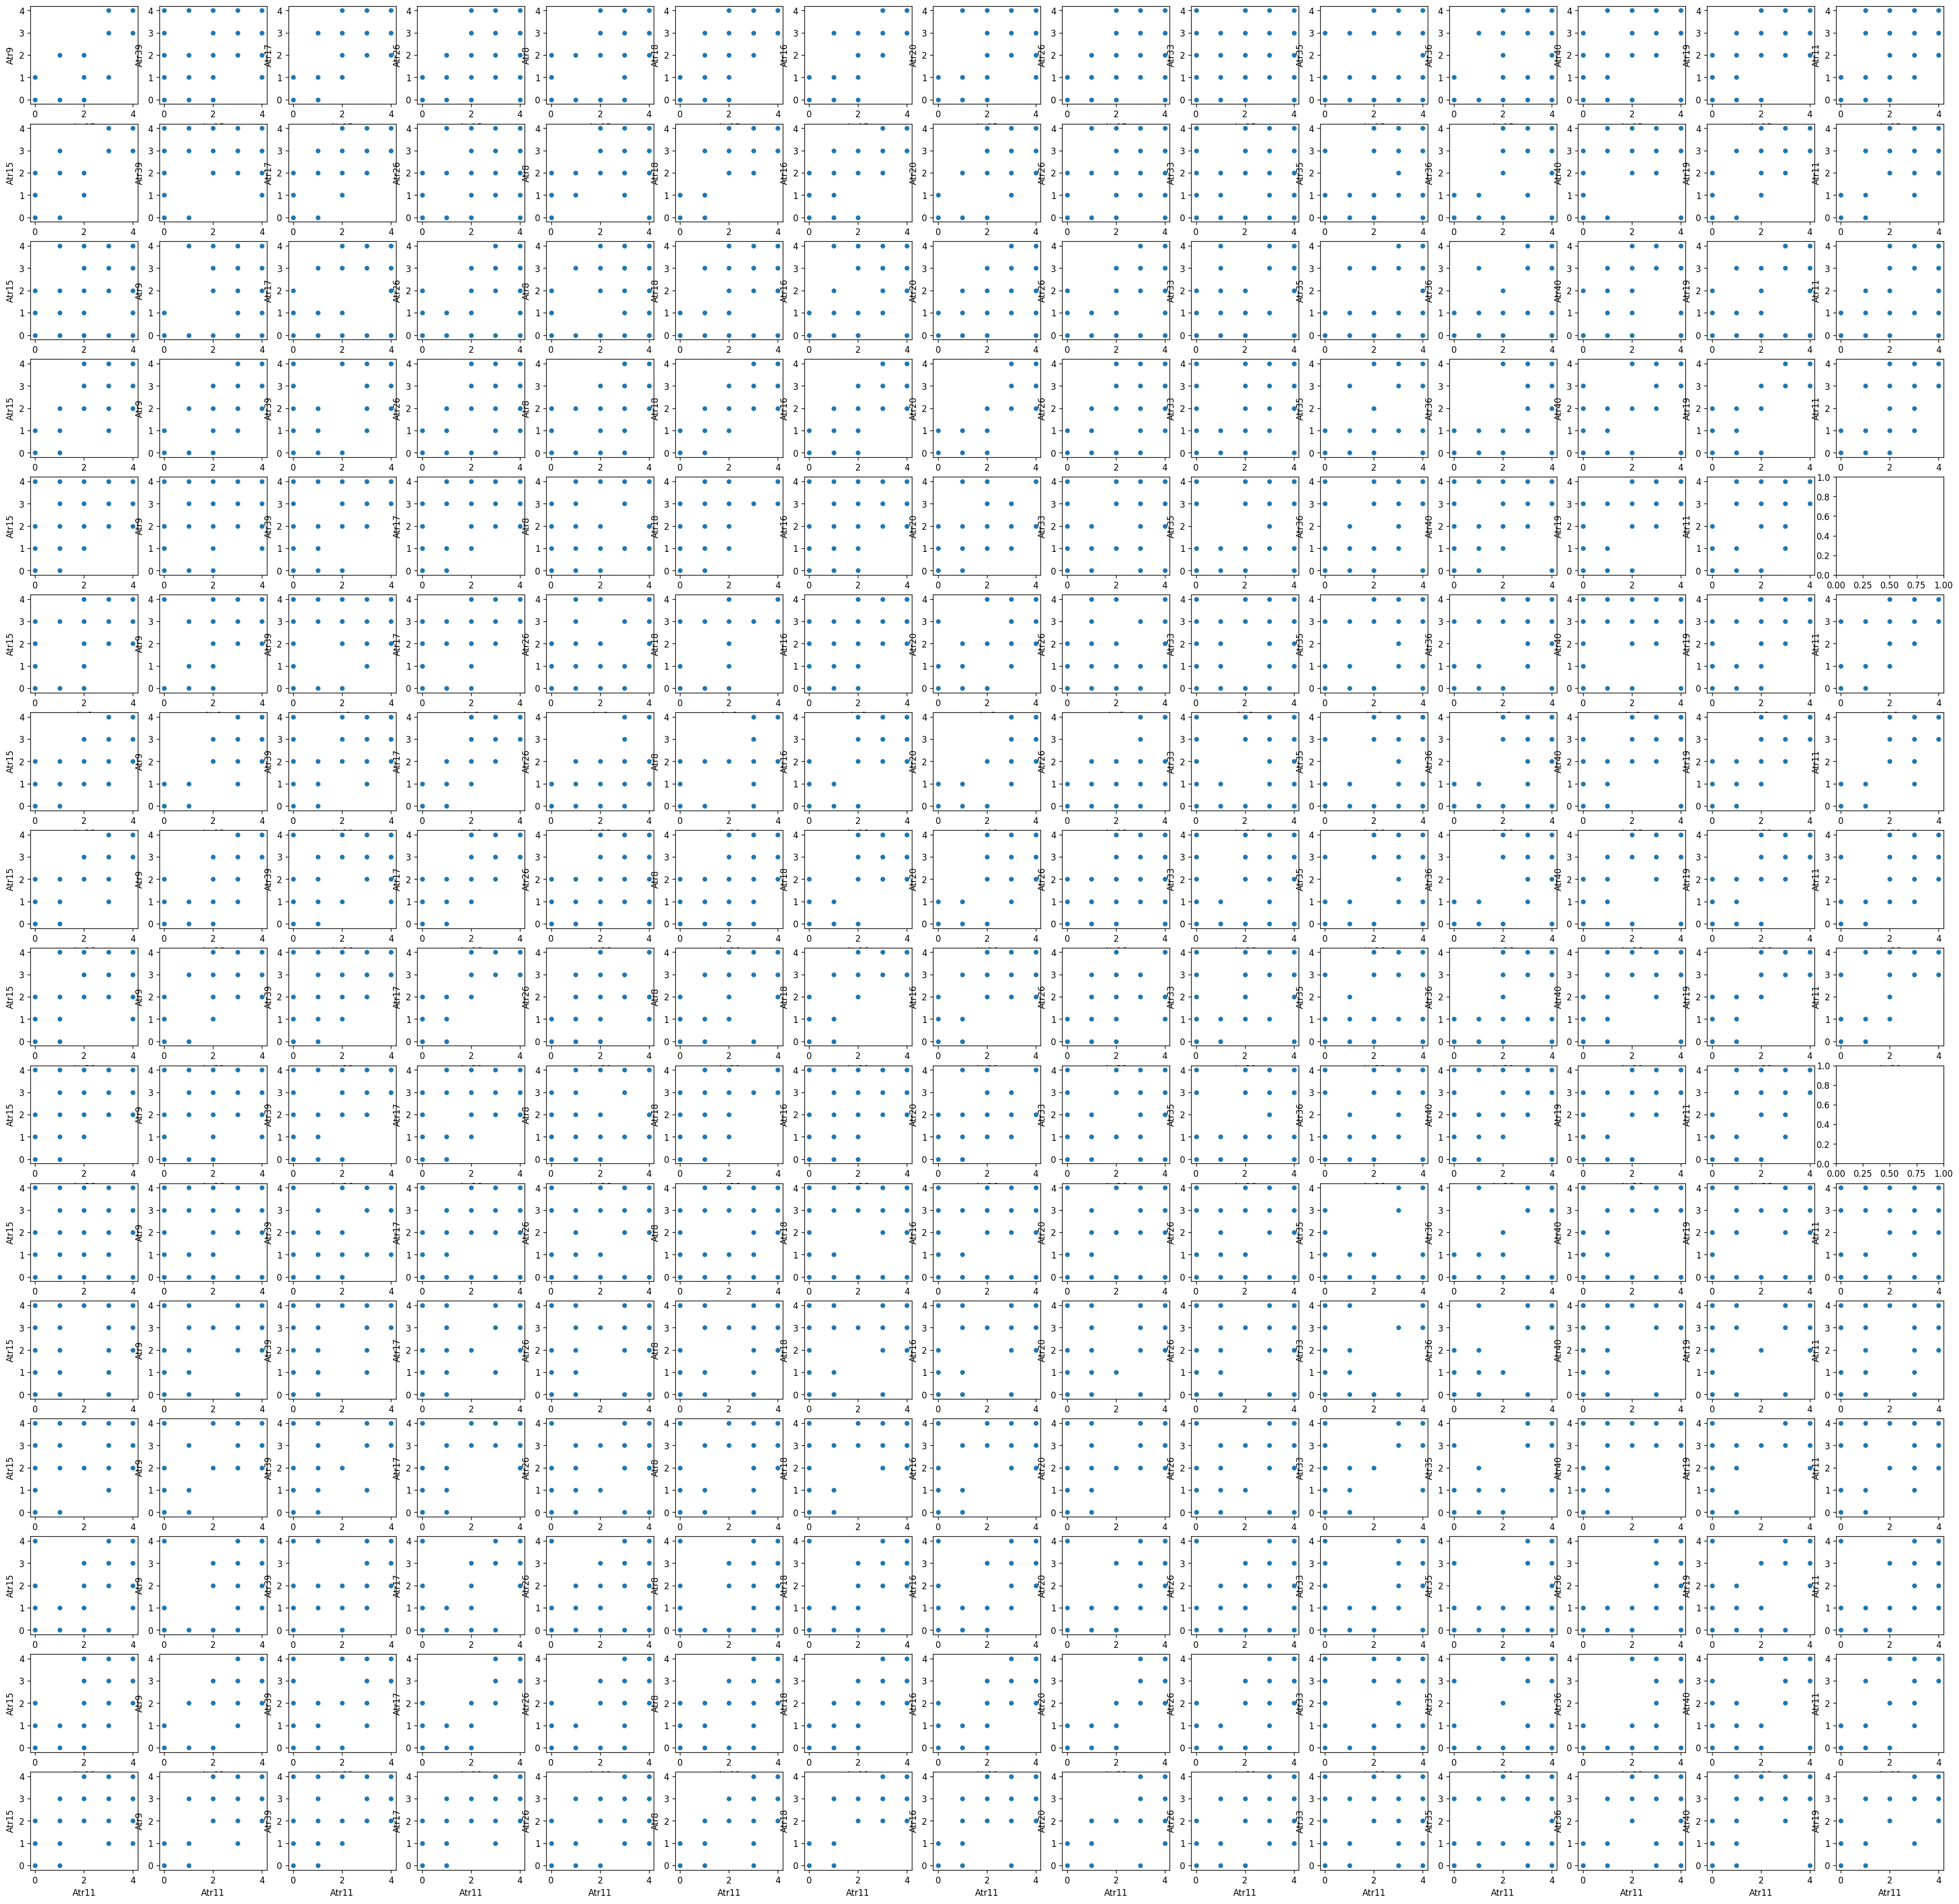

In [8]:
# import pyplot and numpy modules

import matplotlib.pyplot as plot

import numpy as np


X=df.drop('Class',axis=1)
fig, axs = plot.subplots(nrows=16, ncols=15, figsize=(40,40), dpi=120)
# Draw the scatter plot
row=0
column =0
# ,39,17,26,8,18,16,20,26,33,35,36,40,19,11
for i in [15,9,39,17,26,8,18,16,20,26,33,35,36,40,19,11] :
  
  column =0
  for j in [15,9,39,17,26,8,18,16,20,26,33,35,36,40,19,11] :
    
    # try:
      if i!=j :
        
        fig=sns.scatterplot(x='Atr'+str(i), y='Atr'+str(j), data=X , ax=axs[int(row)][column])
        # fig = sns.scatterplot(data=X, y=X.iloc[:,[j]], ax=axs[int(i)][j], x=X.iloc[:,[i]]).set_title('Atr'+str(i))
        # fig=sns.scatterplot(X.iloc[:,[i]], X.iloc[:,[j]])
        axs[row][column].set_xlabel('Atr'+str(i)) 
        axs[row][column].set_ylabel('Atr'+str(j)) 
        column+=1
    # except Exception as e:
    #   pass
  row+=1
    

plot.show()

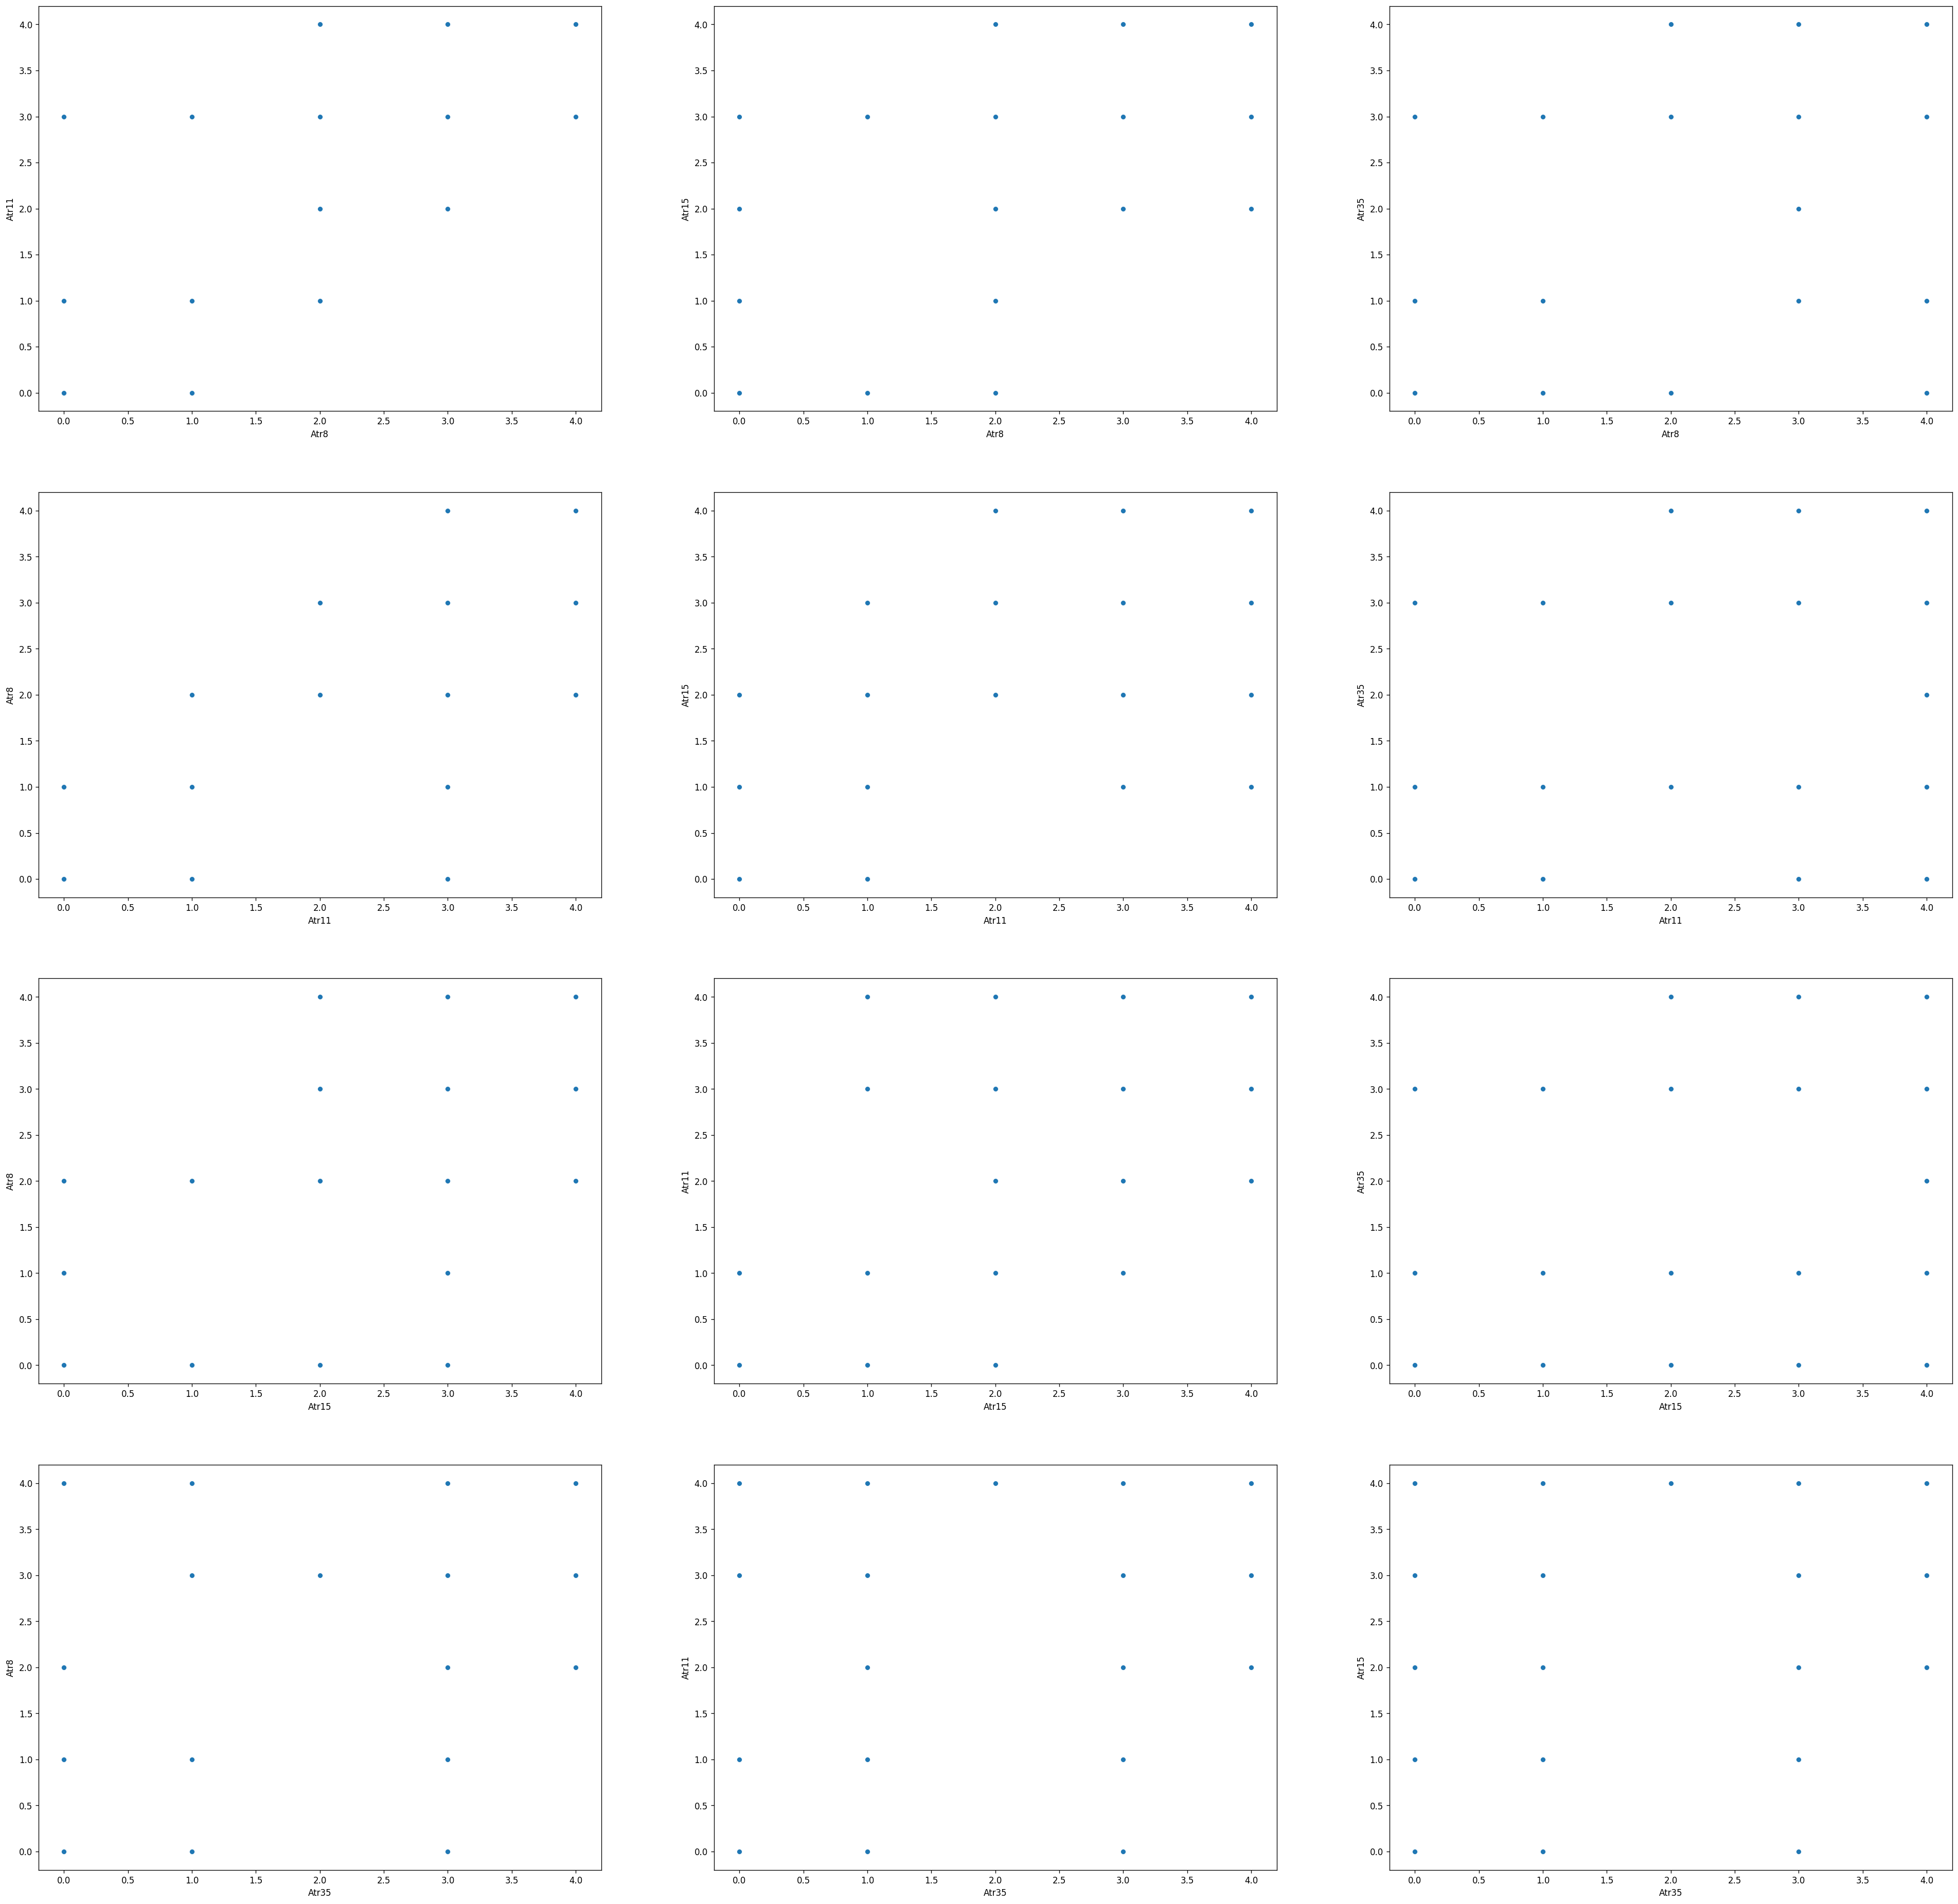

In [9]:
import matplotlib.pyplot as plot

import numpy as np


X=df.drop('Class',axis=1)
fig, axs = plot.subplots(nrows=4, ncols=3, figsize=(40,40), dpi=120)
# Draw the scatter plot
row=0
column =0

for i in [8,11,15,35] :
  
  column =0
  for j in [8,11,15,35] :
    
    # try:
      if i!=j :
        
        fig=sns.scatterplot(x='Atr'+str(i), y='Atr'+str(j), data=X , ax=axs[int(row)][column])
        # fig = sns.scatterplot(data=X, y=X.iloc[:,[j]], ax=axs[int(i)][j], x=X.iloc[:,[i]]).set_title('Atr'+str(i))
        # fig=sns.scatterplot(X.iloc[:,[i]], X.iloc[:,[j]])
        axs[row][column].set_xlabel('Atr'+str(i)) 
        axs[row][column].set_ylabel('Atr'+str(j)) 
        column+=1
    # except Exception as e:
    #   pass
  row+=1
    

plot.show()

In [10]:
y= df['Class']
X=df.drop('Class',axis=1)

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=12)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(chi_feature)
print(str(len(chi_feature)), 'selected features')

['Atr5', 'Atr9', 'Atr11', 'Atr17', 'Atr18', 'Atr19', 'Atr20', 'Atr29', 'Atr33', 'Atr35', 'Atr36', 'Atr40']
12 selected features


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
# X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,[8,10,16,17,18,19,39]],y, test_size=0.33, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,[7,34,10,14]],y, test_size=0.33, random_state=5)
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)
print((X_train.shape))

(113, 4)


**Decision Tree**

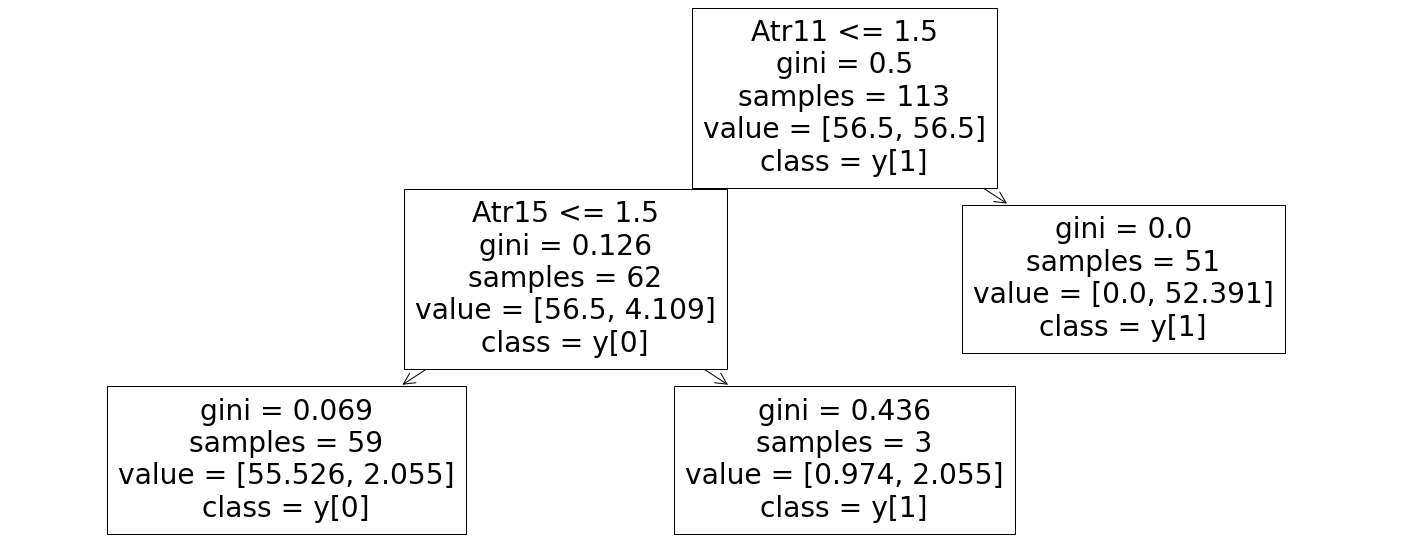

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import tree
parameters = {'criterion':('gini','entropy'), 
              'min_samples_split':[2,3,4,5,6,7,8],
              'max_depth':[1,2,3,4,5], 
              'class_weight':('balanced', None)
}
# clf = DecisionTreeClassifier( max_depth =4, random_state=2 , criterion='gini') #entropy
# clf = clf.fit(X_train,y_train)
tr = DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters,cv=5)
gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_
plt.figure(figsize=(25,10))
tree.plot_tree(model, feature_names=X_train.columns ,class_names = True )
plt.show()

In [14]:
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.9824561403508771


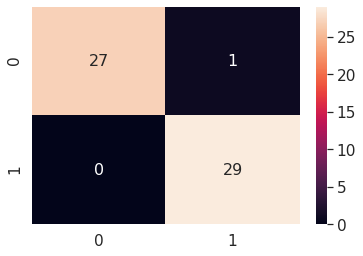

In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predict)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

**Random Forest**

In [16]:
from sklearn.ensemble import RandomForestClassifier 
df = pd.read_csv('/content/drive/MyDrive/dataSpace/divorce.csv')
y= df['Class']
X=df.drop('Class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.33, random_state=5)

pipelines = { "random_forest": RandomForestClassifier(random_state=123,max_depth=10) }

rf_hyperparameters = { "n_estimators": [10, 20, 30, 50, 100] ,
                      "max_features": ["sqrt", 0.10, 0.20, 0.25]
                      } 
hyperparameters = {"random_forest": rf_hyperparameters}

fitted_models = {}
for name, pipeline in pipelines.items(): 
  
  model = GridSearchCV(pipeline, hyperparameters[name], cv= 10, n_jobs= -1)

  model.fit(X_train, y_train)

  fitted_models[name] = model

  print(name, 'has been fitted.')







random_forest has been fitted.


In [17]:
for name, model in fitted_models.items(): 
  pred = model.predict(X_test) 
  print(f'{name} accuracy reached: {accuracy_score(y_test, pred)}')

random_forest accuracy reached: 1.0


In [18]:
from sklearn.ensemble import RandomForestClassifier 
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt 
import seaborn as sns
df = pd.read_csv(dfstr)
y= df['Class']
X=df.drop('Class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.33, random_state=5)
print(X_train.shape)
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators=30, random_state = 123)
# Train the model on training data
rf.fit(X_train, y_train);

(113, 54)


In [19]:
y_predict = rf.predict(X_test)
print(accuracy_score(y_test, y_predict))

1.0


54
[8.99023695e-04 3.46935897e-03 7.71544285e-03 5.91976789e-02
 8.95467160e-02 0.00000000e+00 3.38194482e-03 0.00000000e+00
 9.00244266e-02 2.23180923e-04 8.63780058e-03 8.69117776e-02
 0.00000000e+00 0.00000000e+00 1.47781963e-03 2.74864385e-01
 0.00000000e+00 3.03810331e-02 9.73320948e-03 5.69114190e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.09738381e-01 0.00000000e+00 9.48742031e-03
 7.84895546e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.03753450e-03 0.00000000e+00 0.00000000e+00 1.94283258e-03
 0.00000000e+00 9.68465847e-02 3.54676711e-03 3.47799323e-03
 3.51412608e-03 0.00000000e+00 0.00000000e+00 2.83741368e-03
 0.00000000e+00 0.00000000e+00 3.41366810e-03 0.00000000e+00
 3.90532006e-03 0.00000000e+00 0.00000000e+00 4.60746381e-03
 0.00000000e+00 0.00000000e+00]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 

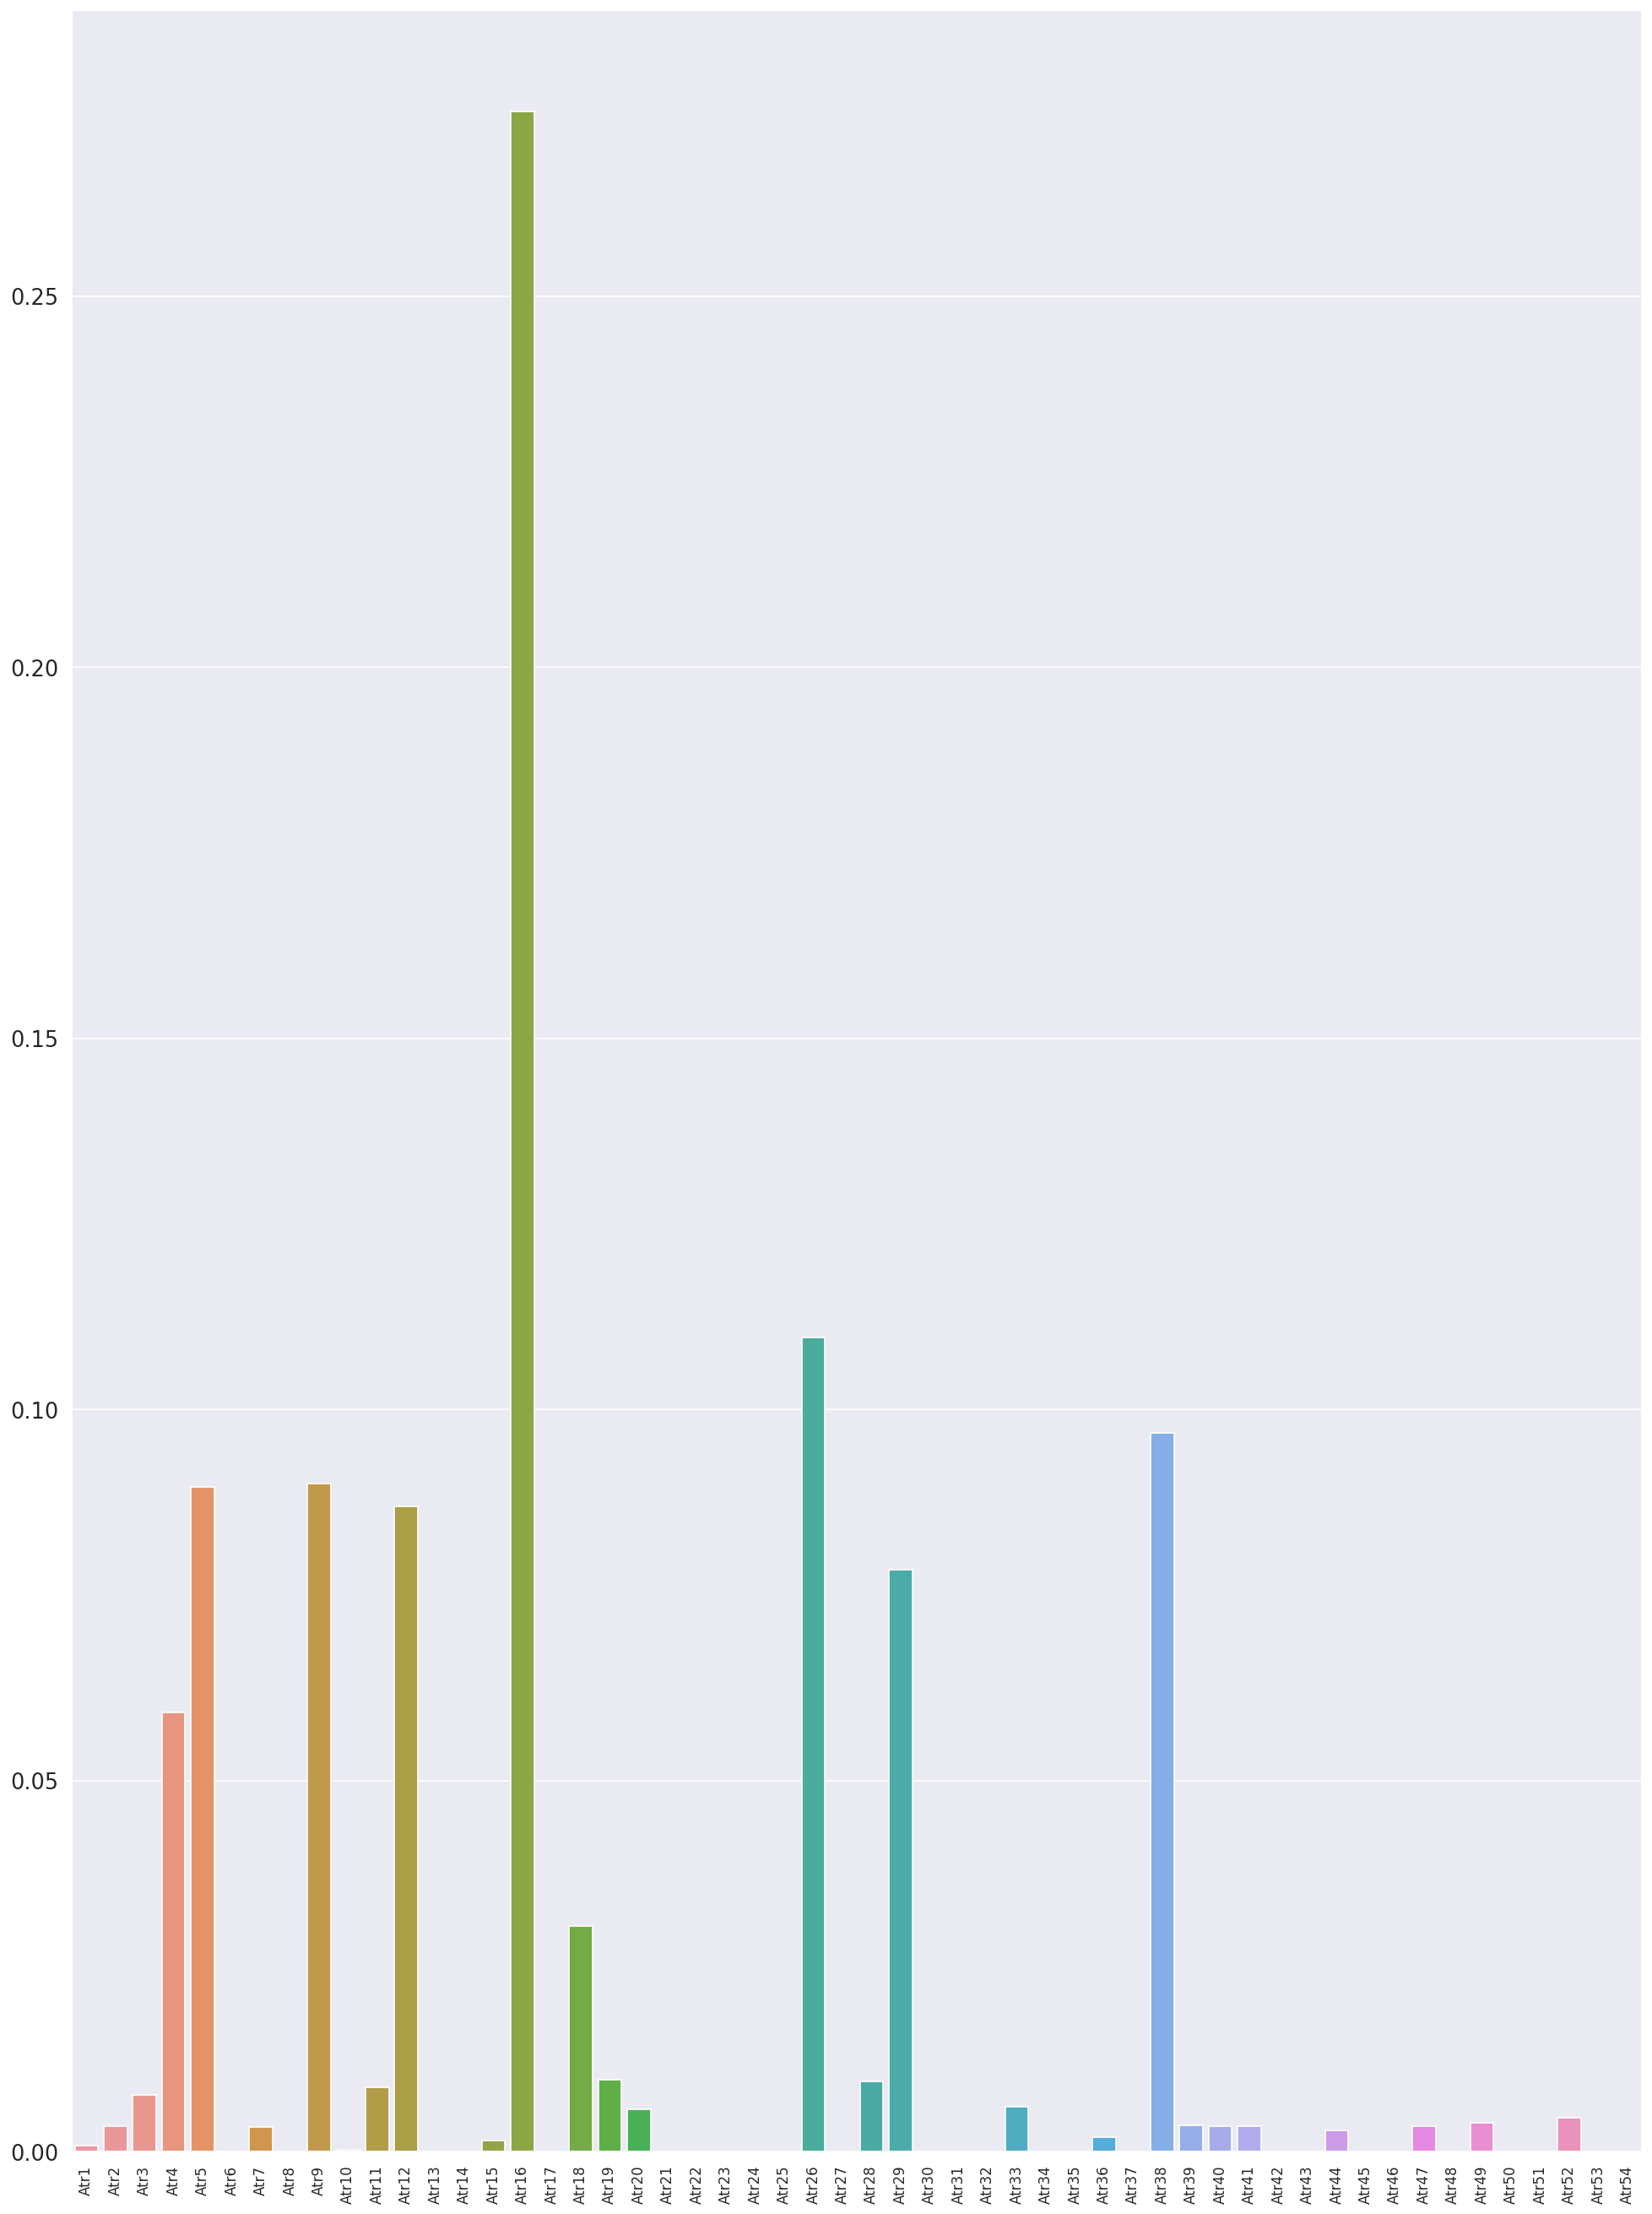

In [20]:
import functools
rf = fitted_models["random_forest"].best_estimator_
names=df.columns
print(rf.feature_importances_.__len__())
print (rf.feature_importances_)
x_val = [x+1 for x in range(rf.feature_importances_.__len__())]
print(x_val)
pair_val = []
for key,val in zip(x_val,rf.feature_importances_): 
  pair_val.append([key,val])
pair_val = sorted(pair_val, key=functools.cmp_to_key(lambda x,y: y[1]-x[1]))
y_val = [x[1] for x in pair_val] 
x_val = [x[0] for x in pair_val]
plt.figure(figsize=(20,28), dpi=120) 
ax = sns.barplot(y=y_val,x=x_val) 
ax.set_xticklabels(names[0:], rotation='vertical', fontsize=10) 
plt.show()


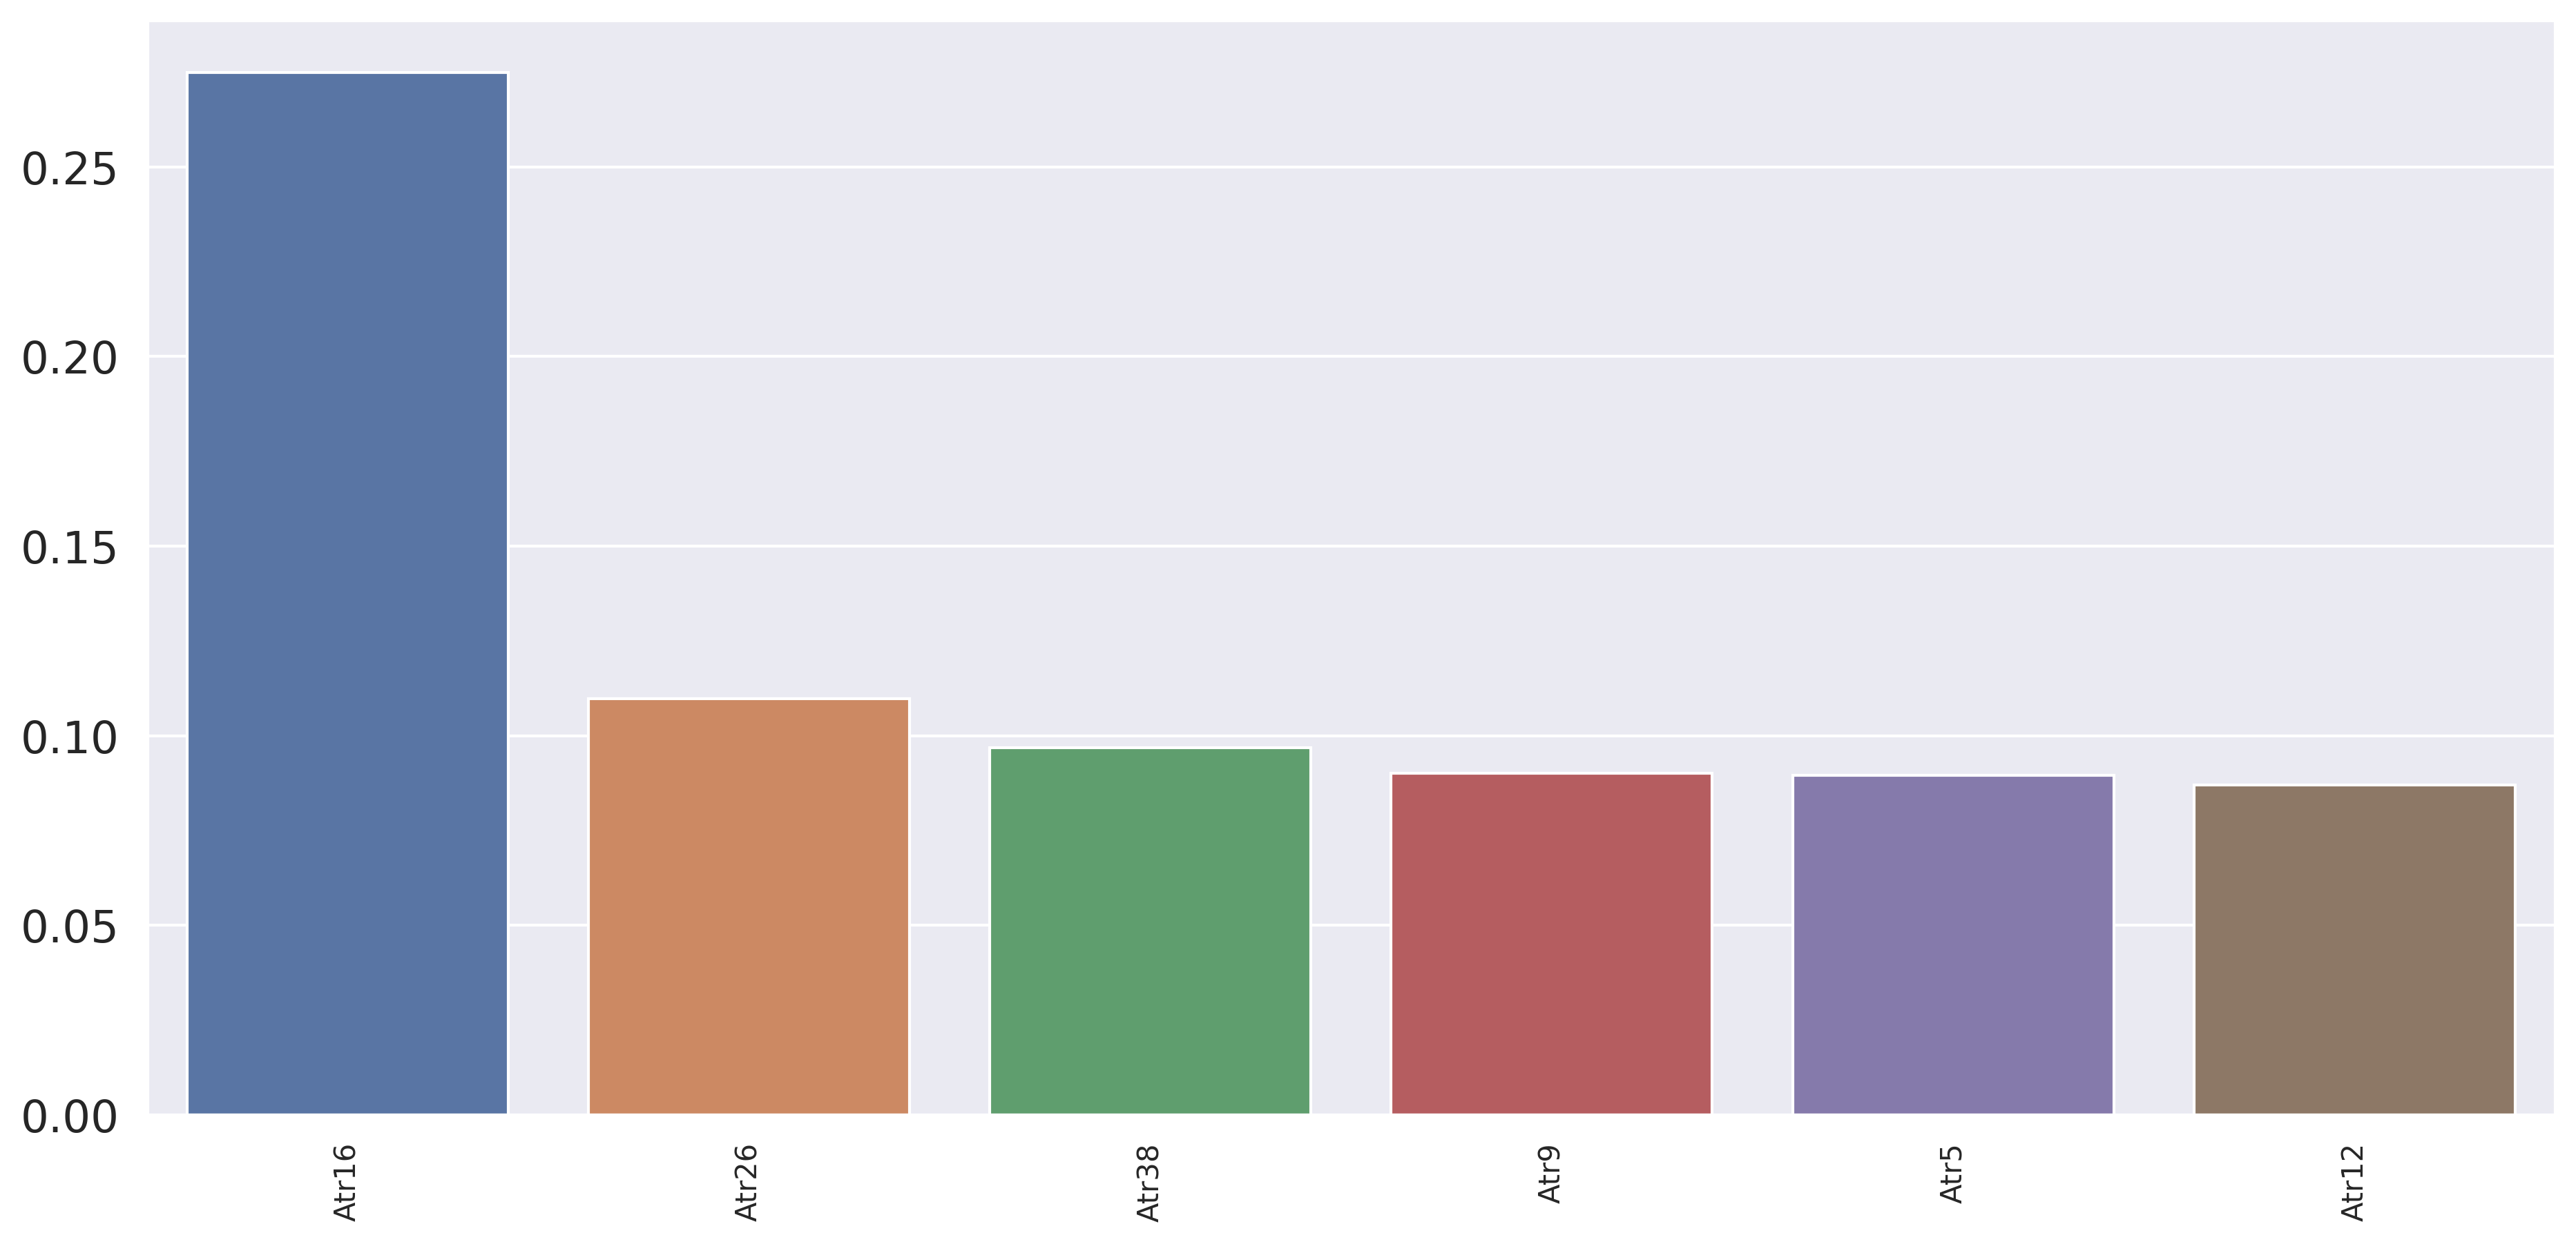

In [21]:
important_attribute = list(map(lambda x: x[0],pair_val[0:6])) 
important_attribute = list(names[x-1] for x in important_attribute)
plt.figure(figsize=(15,7), dpi=300) 
ax = sns.barplot(y=y_val[0:6],x=[x for x in range(6)])
ax.set_xticklabels(important_attribute, rotation='vertical', fontsize=10)
plt.show()


[0.735  0.7775 0.8052 0.8273 0.8476 0.864  0.8771 0.888  0.8979 0.9072
 0.9156 0.9237 0.9306 0.937  0.9428 0.948  0.9526 0.9567 0.9607 0.9643
 0.9678 0.9709 0.9736 0.9762 0.9785 0.9806 0.9825 0.9843 0.9859 0.9874
 0.9887 0.9899 0.991  0.9921 0.9931 0.994  0.9948 0.9956 0.9962 0.9968
 0.9973 0.9978 0.9982 0.9986 0.9989 0.9992 0.9994 0.9996 0.9997 0.9998
 0.9999 1.     1.0001 1.0001]


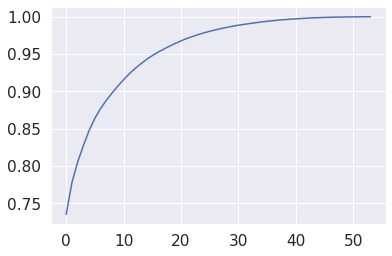

In [22]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

df = pd.read_csv(dfstr)
y= df['Class']
X=df.drop('Class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.33, random_state=5)
#Load data set
data = X_train

#convert it to numpy arrays
X=data.values

#Scaling the values
X = scale(X)

pca = PCA()

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4))

print(var1)
plt.plot(var1)




  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=886f78c7e76af234fb3da538017785f3455c754b9315e335f9d6ab31662c24e4
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [54] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


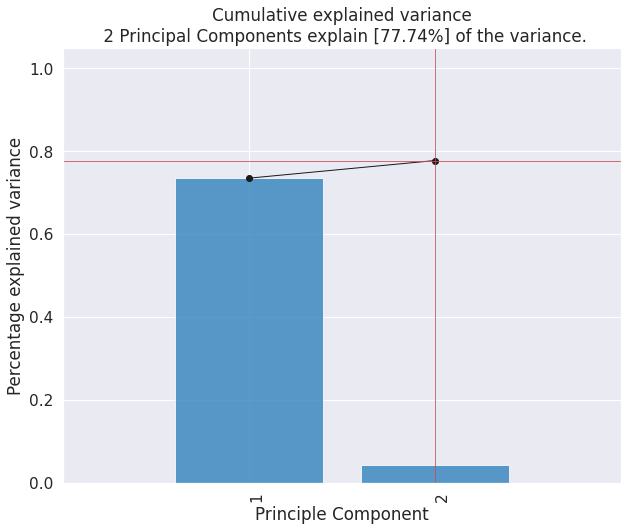

<Figure size 432x288 with 0 Axes>

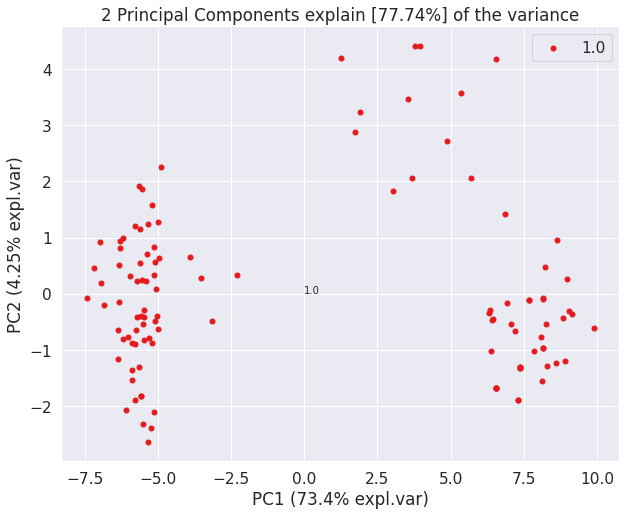

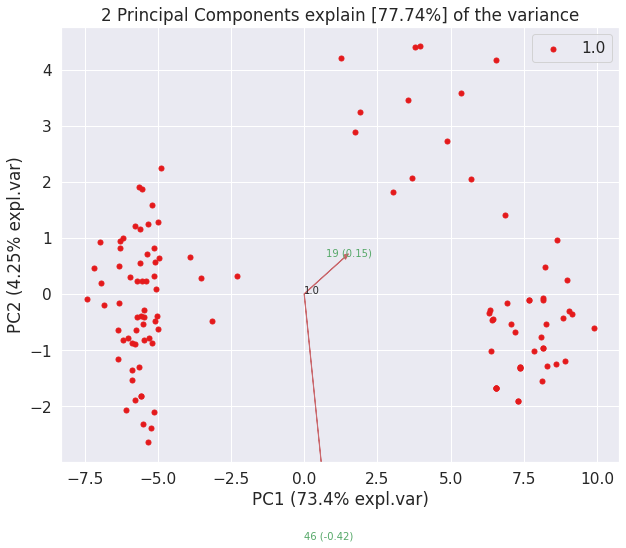

In [23]:
!pip install pca

from pca import pca
df = pd.read_csv(dfstr)
y= df['Class']
X=df.drop('Class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.33, random_state=5)
#Load data set
data = X_train

#convert it to numpy arrays
X=data.values

#Scaling the values
X = scale(X)
# Or reduce the data towards 2 PCs
model = pca(n_components=2)

# Fit transform
results = model.fit_transform(X)

# Plot explained variance
fig, ax = model.plot()

# Scatter first 2 PCs
fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=2)

**Perceptron**

In [24]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
df = pd.read_csv(dfstr)
y= df['Class']
X=df.drop('Class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.33, random_state=5)

for n_components in range(1,4): 
  pca = PCA(n_components=n_components) 
  X_train_m = pca.fit_transform(X_train) 
  X_test_m = pca.transform(X_test)
  clf = Perceptron(alpha = 0.001, random_state=0)
  clf.fit(X_train_m, y_train)
  print('number of components is equal to:' , n_components)
  print('the accuracy is',clf.score(X_test_m, y_test))
# add PCA data

number of components is equal to: 1
the accuracy is 1.0
number of components is equal to: 2
the accuracy is 1.0
number of components is equal to: 3
the accuracy is 1.0


**Logistic Regression**

In [25]:
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
df = pd.read_csv(dfstr)
y= df['Class']
X=df.drop('Class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.33, random_state=5)
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)
clf.score(X_test, y_test)
# Add PCA data

1.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


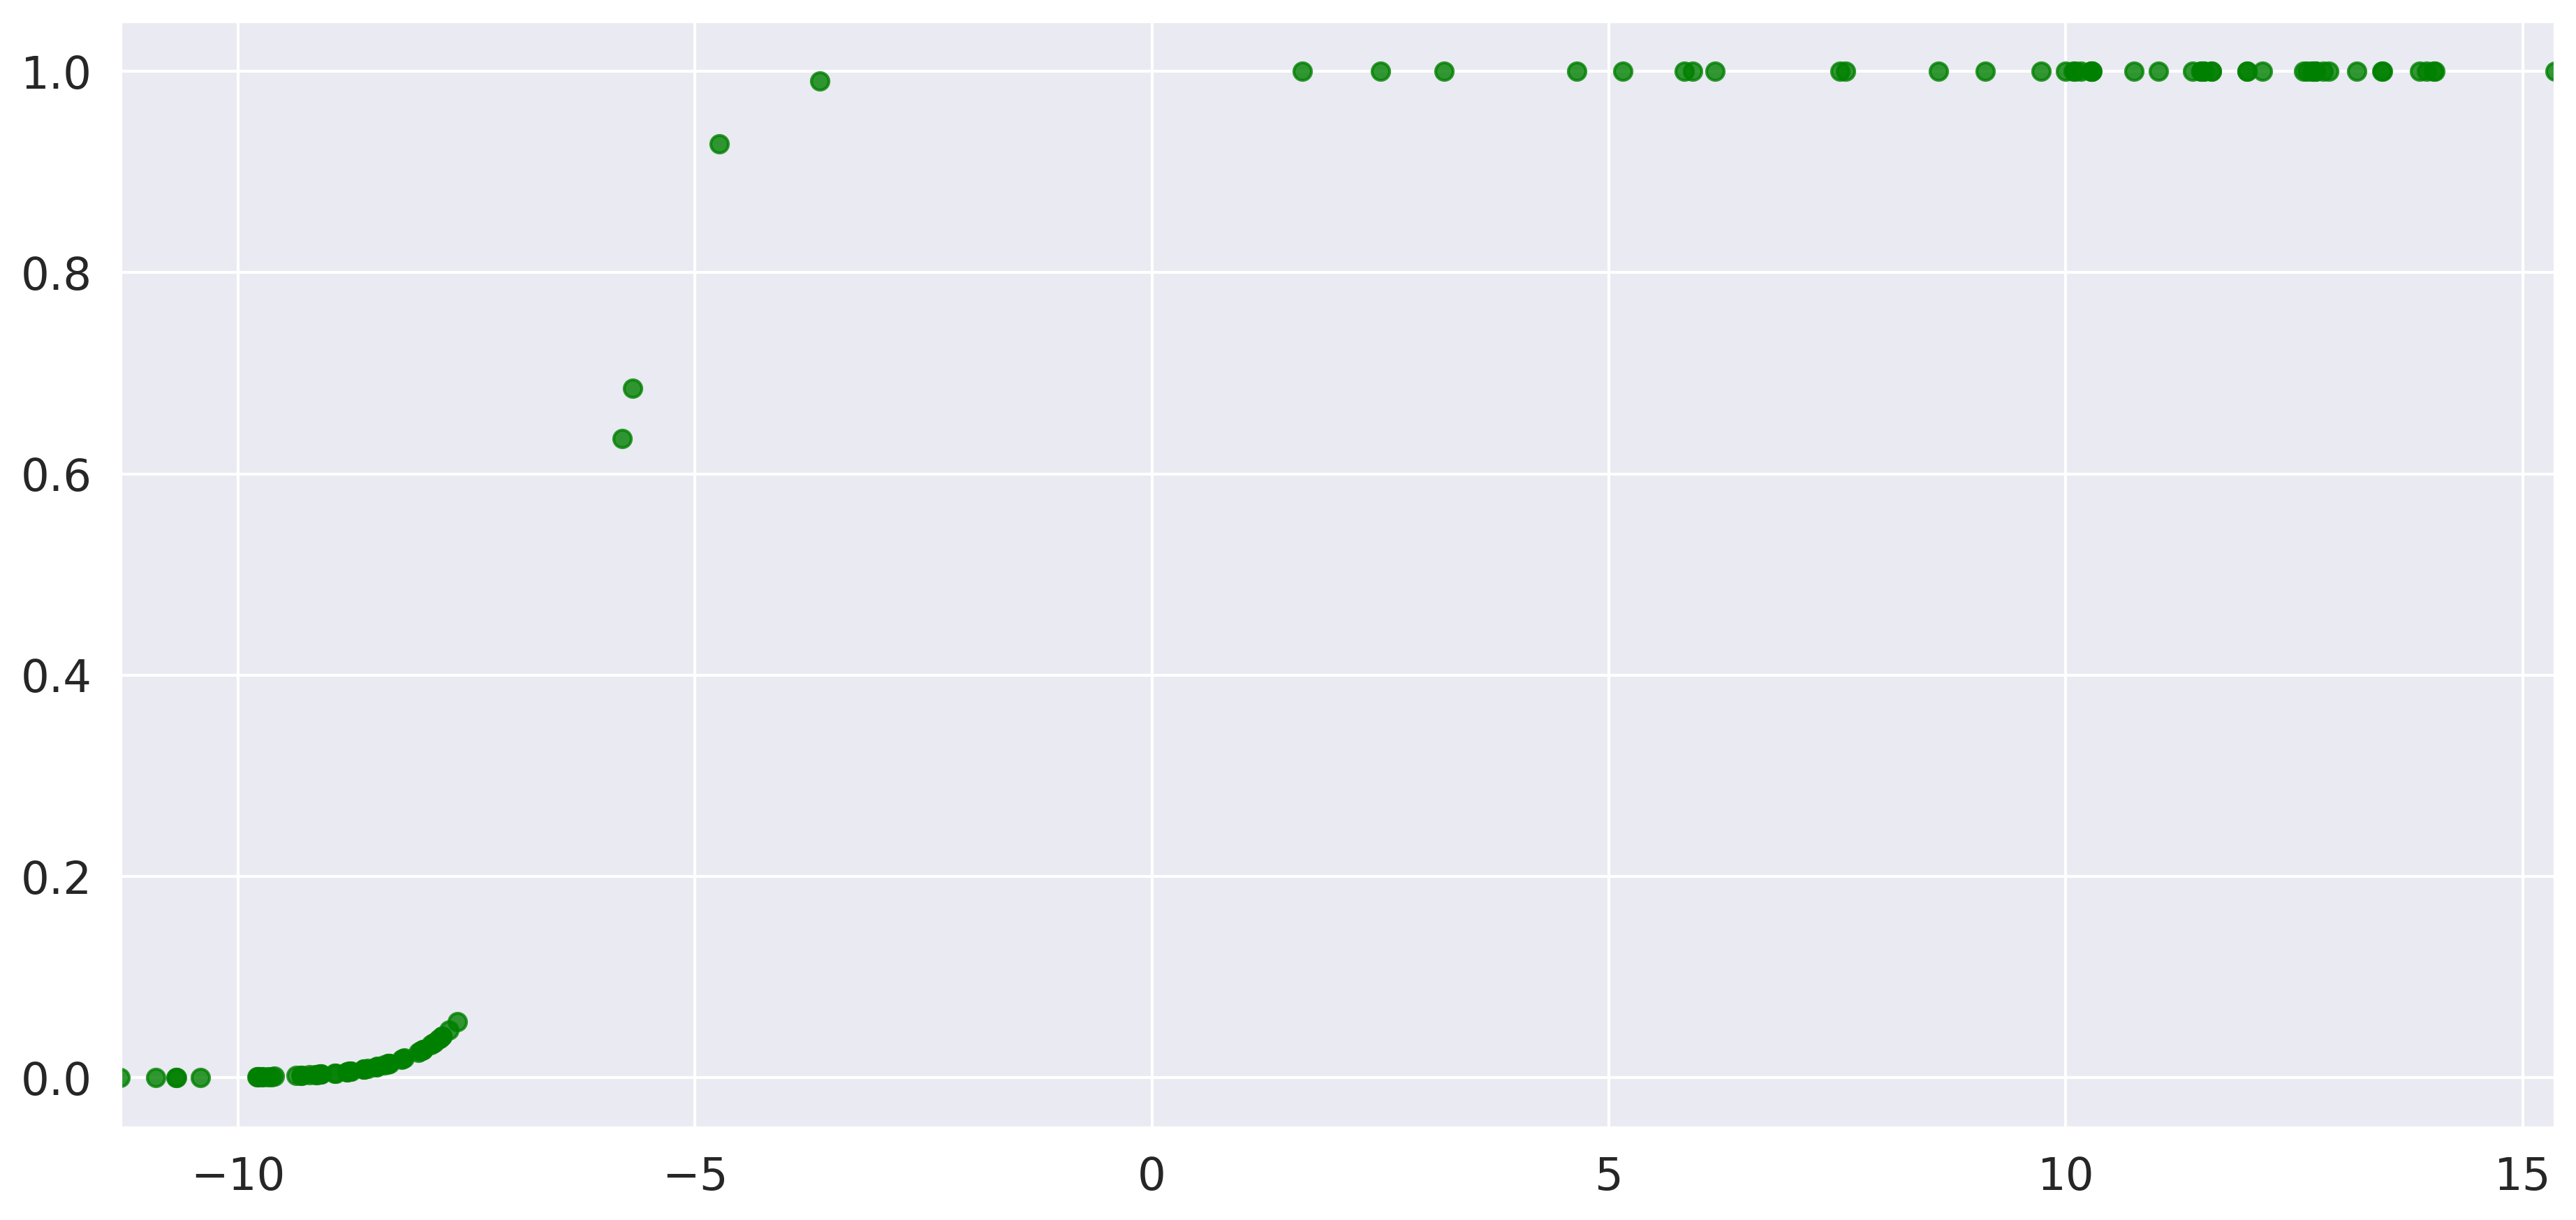

In [26]:
 from os import listdir 
 from os.path import isfile, join 
 from sklearn import preprocessing 
 import pandas as pd 
 import math 
 import seaborn as sns 
 from matplotlib import pyplot as plt 
 from sklearn.decomposition import PCA 
 from sklearn.linear_model import LogisticRegression 
 from sklearn.model_selection import train_test_split, KFold, GridSearchCV 
 from sklearn.preprocessing import StandardScaler 
 import numpy as np 
 from scipy.special import expit
 %matplotlib inline


plot_decision_1d = True
accuracy = []
df = pd.read_csv(dfstr)
y= df['Class']
X=df.drop('Class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.33, random_state=5)

for n_components in range(1,6): 
  pca = PCA(n_components=n_components)
  X_train_m = pca.fit_transform(X_train)
  X_test_m = pca.transform(X_test)
  logisticRegr = LogisticRegression(solver="lbfgs")
  logisticRegr.fit(X_train_m, y_train) 
  if X_train_m.shape[1]==1:
     plt.figure(figsize=(15,7), dpi=300)
     if plot_decision_1d:
       sns.regplot(X_train_m, logisticRegr.predict_proba(X_train_m)[:,1] , logistic=True, color='green')
     plt.show()
  accuracy.append(logisticRegr.score(X_test_m,y_test))




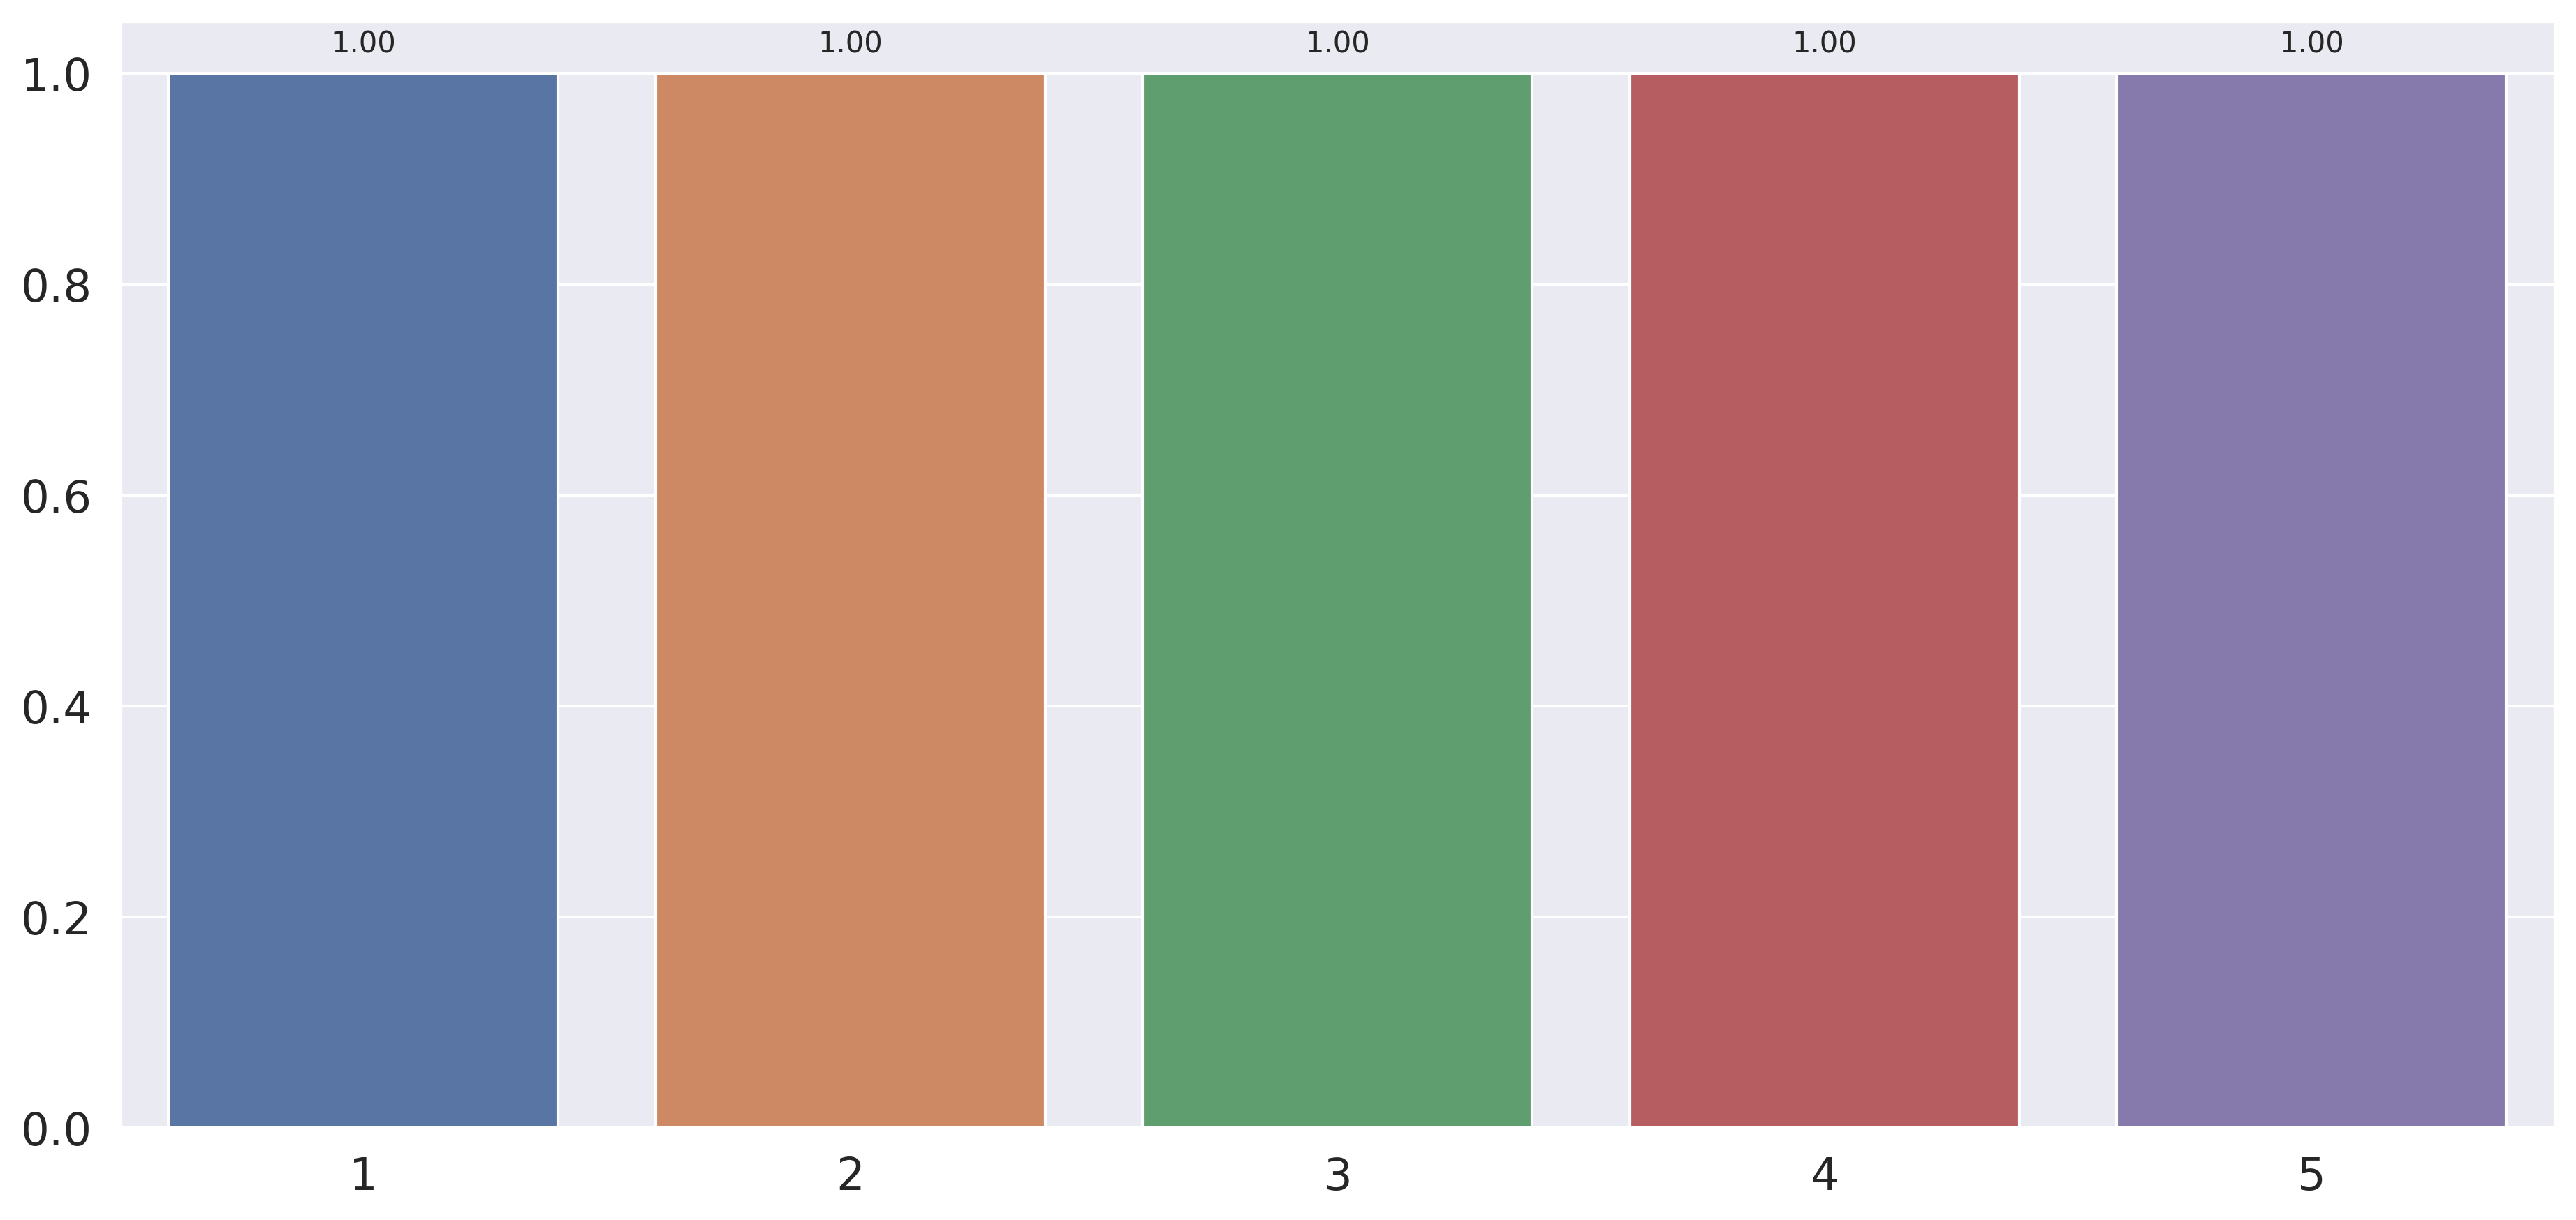

In [27]:

plt.figure(figsize=(15,7), dpi=300)
splot = sns.barplot(y=accuracy,x=[x for x in range(1,6)]) 
for p in splot.patches:
   splot.annotate(format(p.get_height(), '.2f')
   ,(p.get_x() + p.get_width() /2., p.get_height())
   , ha = 'center', va = 'center',
    xytext = (0, 10),textcoords = 'offset points')
plt.show()

**SVM**

In [28]:
from sklearn import svm
from os import listdir 
from os.path import isfile, join 
from sklearn import preprocessing 
import pandas as pd 
import math 
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV 
from sklearn.preprocessing import StandardScaler 
import numpy as np 
%matplotlib inline
from sklearn.datasets import load_digits
df = pd.read_csv(dfstr)
y= df['Class']
X=df.drop('Class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.33, random_state=5)
accuracy=[]
for n_components in range(1,6): 
  pca = PCA(n_components=n_components) 
  X_train_m = pca.fit_transform(X_train) 
  X_test_m = pca.transform(X_test)
  clf = svm.SVC(kernel='linear')
  clf.fit(X_train_m, y_train)

  print('number of components is equal to:' , n_components)
  print('the accuracy is',clf.score(X_test_m, y_test))
  accuracy.append(clf.score(X_test_m,y_test))
# Add PCA data

number of components is equal to: 1
the accuracy is 1.0
number of components is equal to: 2
the accuracy is 1.0
number of components is equal to: 3
the accuracy is 1.0
number of components is equal to: 4
the accuracy is 1.0
number of components is equal to: 5
the accuracy is 1.0


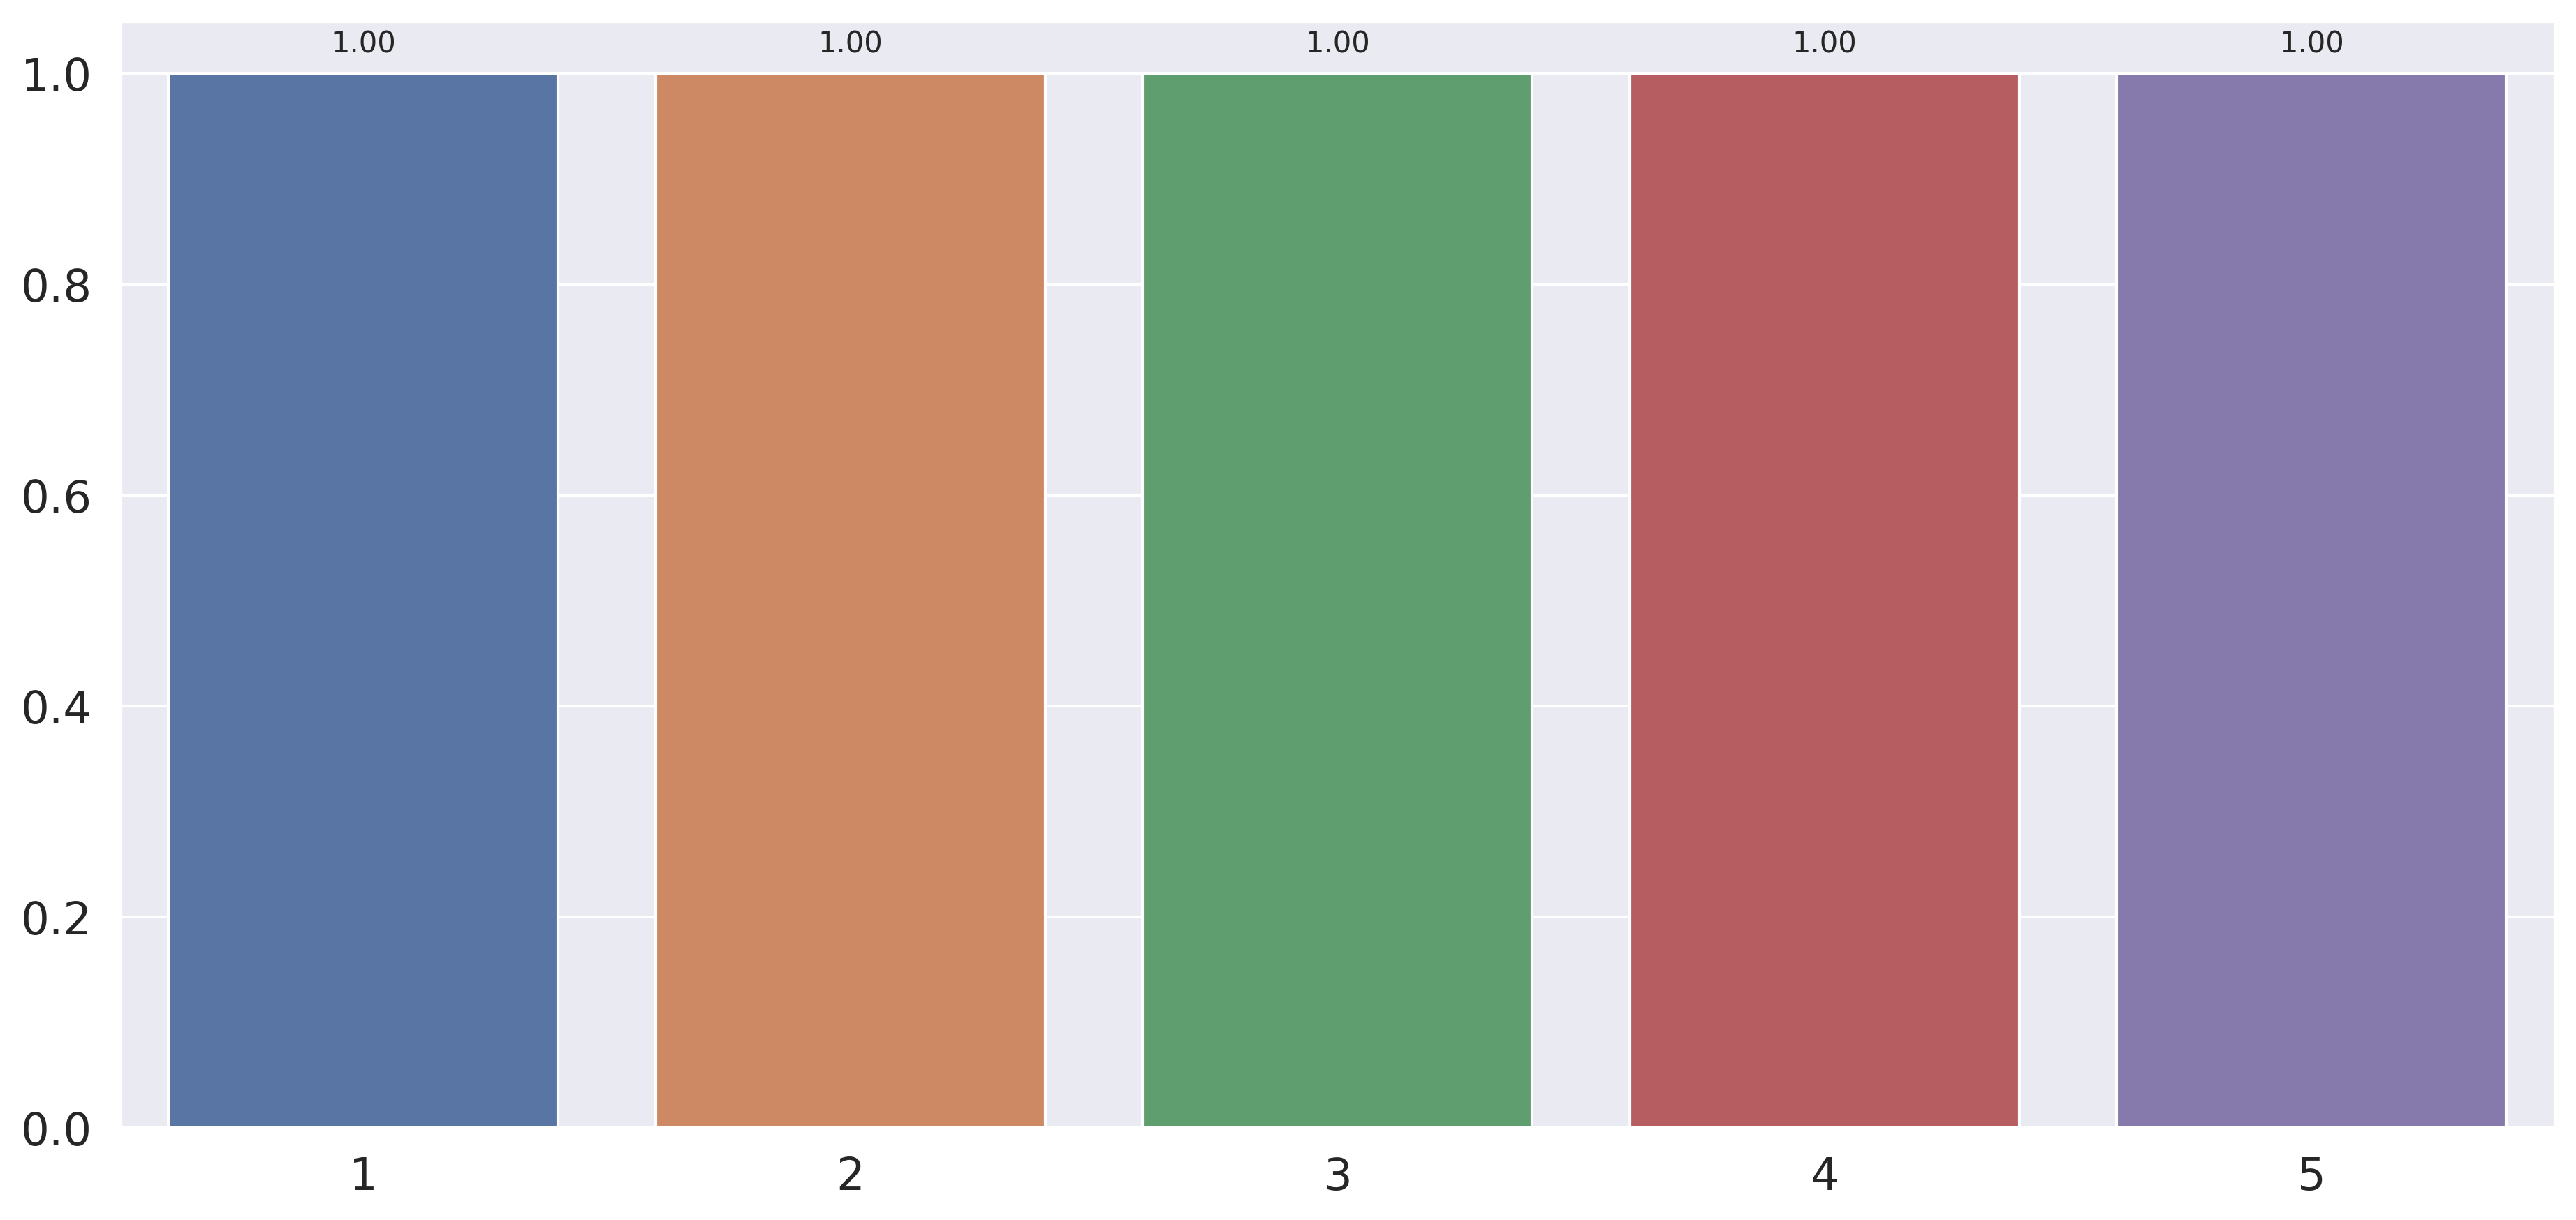

In [29]:
plt.figure(figsize=(15,7), dpi=300) 
splot = sns.barplot(y=accuracy,x=[x for x in range(1,6)]) 
for p in splot.patches: 
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() /2., 
                                                 p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),
                 textcoords = 'offset points')
plt.show()


1.0


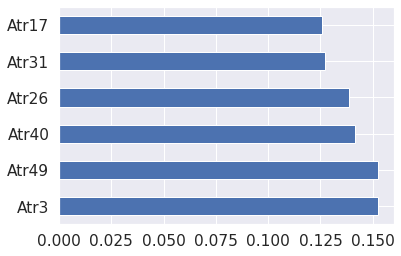

In [30]:
from sklearn import svm
from os import listdir 
from os.path import isfile, join 
from sklearn import preprocessing 
import pandas as pd 
import math 
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV 
from sklearn.preprocessing import StandardScaler 
import numpy as np 
from sklearn.metrics import accuracy_score
%matplotlib inline
df = pd.read_csv(dfstr)
y= df['Class']
X=df.drop('Class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.33, random_state=5)


#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
pd.Series(clf.coef_[0], index=X_train.columns).nlargest(6).plot(kind='barh')



**K Nearest Neighbors**

number of neighbours:  1
number of components:  1
1.0
number of neighbours:  2
number of components:  1
1.0
number of neighbours:  3
number of components:  1
1.0
number of neighbours:  1
number of components:  2
1.0


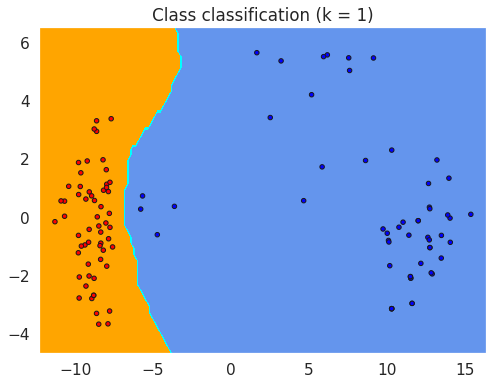

number of neighbours:  2
number of components:  2
1.0


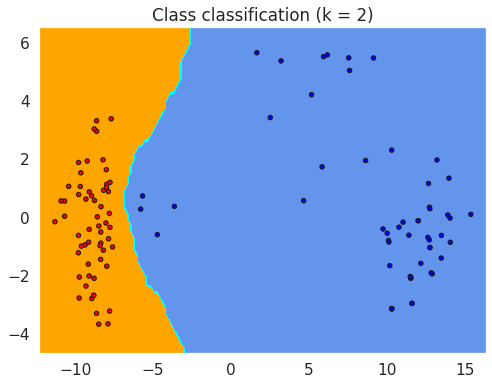

number of neighbours:  3
number of components:  2
1.0


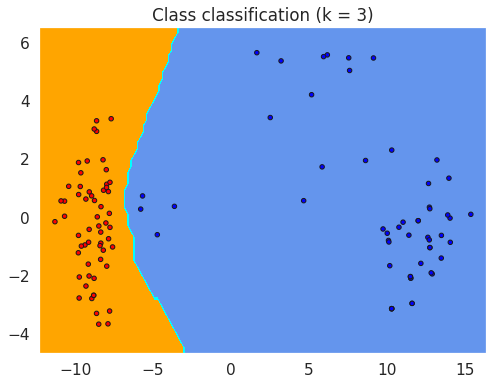

number of neighbours:  1
number of components:  3
1.0
number of neighbours:  2
number of components:  3
1.0
number of neighbours:  3
number of components:  3
1.0


In [31]:
import pandas as pd 
import math 
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV 
import numpy as np 
from matplotlib.colors import ListedColormap 
%matplotlib inline
from sklearn.metrics import accuracy_score



heat_map = []
df = pd.read_csv(dfstr)
y= df['Class']
X=df.drop('Class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.33, random_state=5)
h=0.2
for n_components in range(1,4): 
  pca = PCA(n_components=n_components) 
  X_train_m = pca.fit_transform(X_train) 
  X_test_m = pca.transform(X_test)
  temp_map = []
  for k in range(1,4):
    neigh = KNeighborsClassifier(n_neighbors=k ) 
    neigh.fit(X_train_m, y_train)
    y_pred = neigh.predict(X_test_m)
    print("number of neighbours: " , k)
    print("number of components: " , n_components)
    print(accuracy_score(y_test, y_pred) )
    if(n_components==2):
      
      cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
      cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF']) 

      x_min, x_max = X_train_m[:, 0].min() - 1, X_train_m[:, 0].max() + 1
      y_min, y_max = X_train_m[:, 1].min() - 1, X_train_m[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
      Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
      # sns.scatterplot(x=X_train_m[:, 0], y=X_train_m[:, 1], hue=y,
      #                 palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.scatter(X_train_m[:, 0], X_train_m[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20) 
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Class classification (k = %i)"
              % (k))
    # plt.xlabel(iris.feature_names[0])
    # plt.ylabel(iris.feature_names[1])

      plt.show()




Time comparison in case of using PCA

In [5]:
 from os import listdir 
 from os.path import isfile, join 
 from sklearn import preprocessing 
 import pandas as pd 
 import math 
 import seaborn as sns 
 from matplotlib import pyplot as plt 
 from sklearn.decomposition import PCA 
 from sklearn.linear_model import LogisticRegression 
 from sklearn.model_selection import train_test_split, KFold, GridSearchCV 
 from sklearn.preprocessing import StandardScaler 
 import numpy as np 
 from scipy.special import expit
 %matplotlib inline
 import time


plot_decision_1d = True
accuracy = []
df = pd.read_csv(dfstr)
y= df['Class']
X=df.drop('Class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.33, random_state=5)


  # pca = PCA(n_components=n_components)
  # X_train_m = pca.fit_transform(X_train)
  # X_test_m = pca.transform(X_test)
logisticRegr = LogisticRegression(solver="lbfgs")
start = time.time()
logisticRegr.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s") 

Training time: 0.010486841201782227s


In [6]:
 from os import listdir 
 from os.path import isfile, join 
 from sklearn import preprocessing 
 import pandas as pd 
 import math 
 import seaborn as sns 
 from matplotlib import pyplot as plt 
 from sklearn.decomposition import PCA 
 from sklearn.linear_model import LogisticRegression 
 from sklearn.model_selection import train_test_split, KFold, GridSearchCV 
 from sklearn.preprocessing import StandardScaler 
 import numpy as np 
 from scipy.special import expit
 %matplotlib inline
 import time


plot_decision_1d = True
accuracy = []
df = pd.read_csv(dfstr)
y= df['Class']
X=df.drop('Class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.33, random_state=5)


pca = PCA(n_components=1)
X_train_m = pca.fit_transform(X_train)
X_test_m = pca.transform(X_test)
logisticRegr = LogisticRegression(solver="lbfgs")
start = time.time()
logisticRegr.fit(X_train_m, y_train)
stop = time.time()
print(f"Training time: {stop - start}s") 

Training time: 0.00778961181640625s
